In [203]:
import pandas as pd
import numpy as np

# Load the Excel file
xls = pd.read_excel(r'D:\MSAIM\trimister-2 msaiml\Adv-Machine_learning\DATASETS\Investment_dataset\IMFInvestmentandCapitalStockDataset2021 (2).xlsx', sheet_name=['Definitions', 'Dataset'])

# Extract the 'Dataset' sheet
df = xls['Dataset']
df_ = xls['Dataset']
# Convert the 'income' column to dummy variables
df = pd.concat([df, pd.get_dummies(df['income'], prefix='income')], axis=1)
df.drop('income', axis=1, inplace=True)


In [122]:
df_india = df[df['country']=='India']
df_india.groupby('country').apply(lambda x: x.sort_values('year')).head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_34280\729605786.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_india.groupby('country').apply(lambda x: x.sort_values('year')).head()


isocode  ifscode country  year  igov_rppp   kgov_rppp  \
country                                                              
India   4560     IND      534   India  1960  21.343164  469.095490   
        4561     IND      534   India  1961  22.196890  478.444489   
        4562     IND      534   India  1962  23.084764  488.313263   
        4563     IND      534   India  1963  24.008156  498.718750   
        4564     IND      534   India  1964  24.968483  509.678558   

              ipriv_rppp  kpriv_rppp  ippp_rppp  kppp_rppp    GDP_rppp  \
country                                                                  
India   4560   44.512562  414.289185        NaN        NaN  447.601074   
        4561   46.293060  440.248566        NaN        NaN  463.651825   
        4562   48.144779  466.752167        NaN        NaN  479.111816   
        4563   50.070572  493.835327        NaN        NaN  510.586517   
        4564   52.073395  521.534241        NaN        NaN  548.536560   

              igov_n  kgov_n  ipriv_n  kpriv_n  kppp_n       GDP_n  \
country                                                              
India   4560     NaN     NaN      NaN      NaN     NaN  175.371170   
        4561     NaN     NaN      NaN      NaN     NaN  185.017517   
        4562     NaN     NaN      NaN      NaN     NaN  198.925888   
        4563     NaN     NaN      NaN      NaN     NaN  228.274063   
        4564     NaN     NaN      NaN      NaN     NaN  266.142548   

              income_Advanced Economies  income_Emerging Market Economies  \
country                                                                     
India   4560                      False                              True   
        4561                      False                              True   
        4562                      False                              True   
        4563                      False                              True   
        4564                      False                              True   

              income_Low Income Developing Countries  
country                                               
India   4560                                   False  
        4561                                   False  
        4562                                   False  
        4563                                   False  
        4564                                   False

In [123]:
for col in ['kppp_rppp', 'ippp_rppp','kppp_n']:
    df_india[col].fillna('0.0', inplace=True)

df_india = df_india.reset_index()  # Ensure a numeric index
null_sum = df_india.isnull().sum()
print(null_sum)

index                                      0
isocode                                    0
ifscode                                    0
country                                    0
year                                       0
igov_rppp                                  0
kgov_rppp                                  0
ipriv_rppp                                 0
kpriv_rppp                                 0
ippp_rppp                                  0
kppp_rppp                                  0
GDP_rppp                                   0
igov_n                                    10
kgov_n                                    10
ipriv_n                                   10
kpriv_n                                   10
kppp_n                                     0
GDP_n                                      0
income_Advanced Economies                  0
income_Emerging Market Economies           0
income_Low Income Developing Countries     0
dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_34280\957458753.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_india[col].fillna('0.0', inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_34280\957458753.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_india[col].fillna('0.0', inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_3428

In [5]:
null_cols = [col for col in df_india.columns if df_india[col].isnull().sum() > 0]
print(null_cols)

['igov_n', 'kgov_n', 'ipriv_n', 'kpriv_n']


In [ ]:
df_india.head(12)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [7]:
df_india_12_rows = df_india.iloc[0:12]
df_india_ = df_india.iloc[12:60]


In [8]:
df_india_.shape , df_india_12_rows.shape 

((48, 21), (12, 21))

In [9]:
lin_df = df_india_.drop(['country','index','isocode','ifscode'], axis=1)
lin_df = lin_df.sort_values('year')
targets = null_cols

Pearson Correlation Coefficient for igov_n: 0.86
Pearson Correlation Coefficient for kgov_n: 0.88
Pearson Correlation Coefficient for ipriv_n: 0.83
Pearson Correlation Coefficient for kpriv_n: 0.81


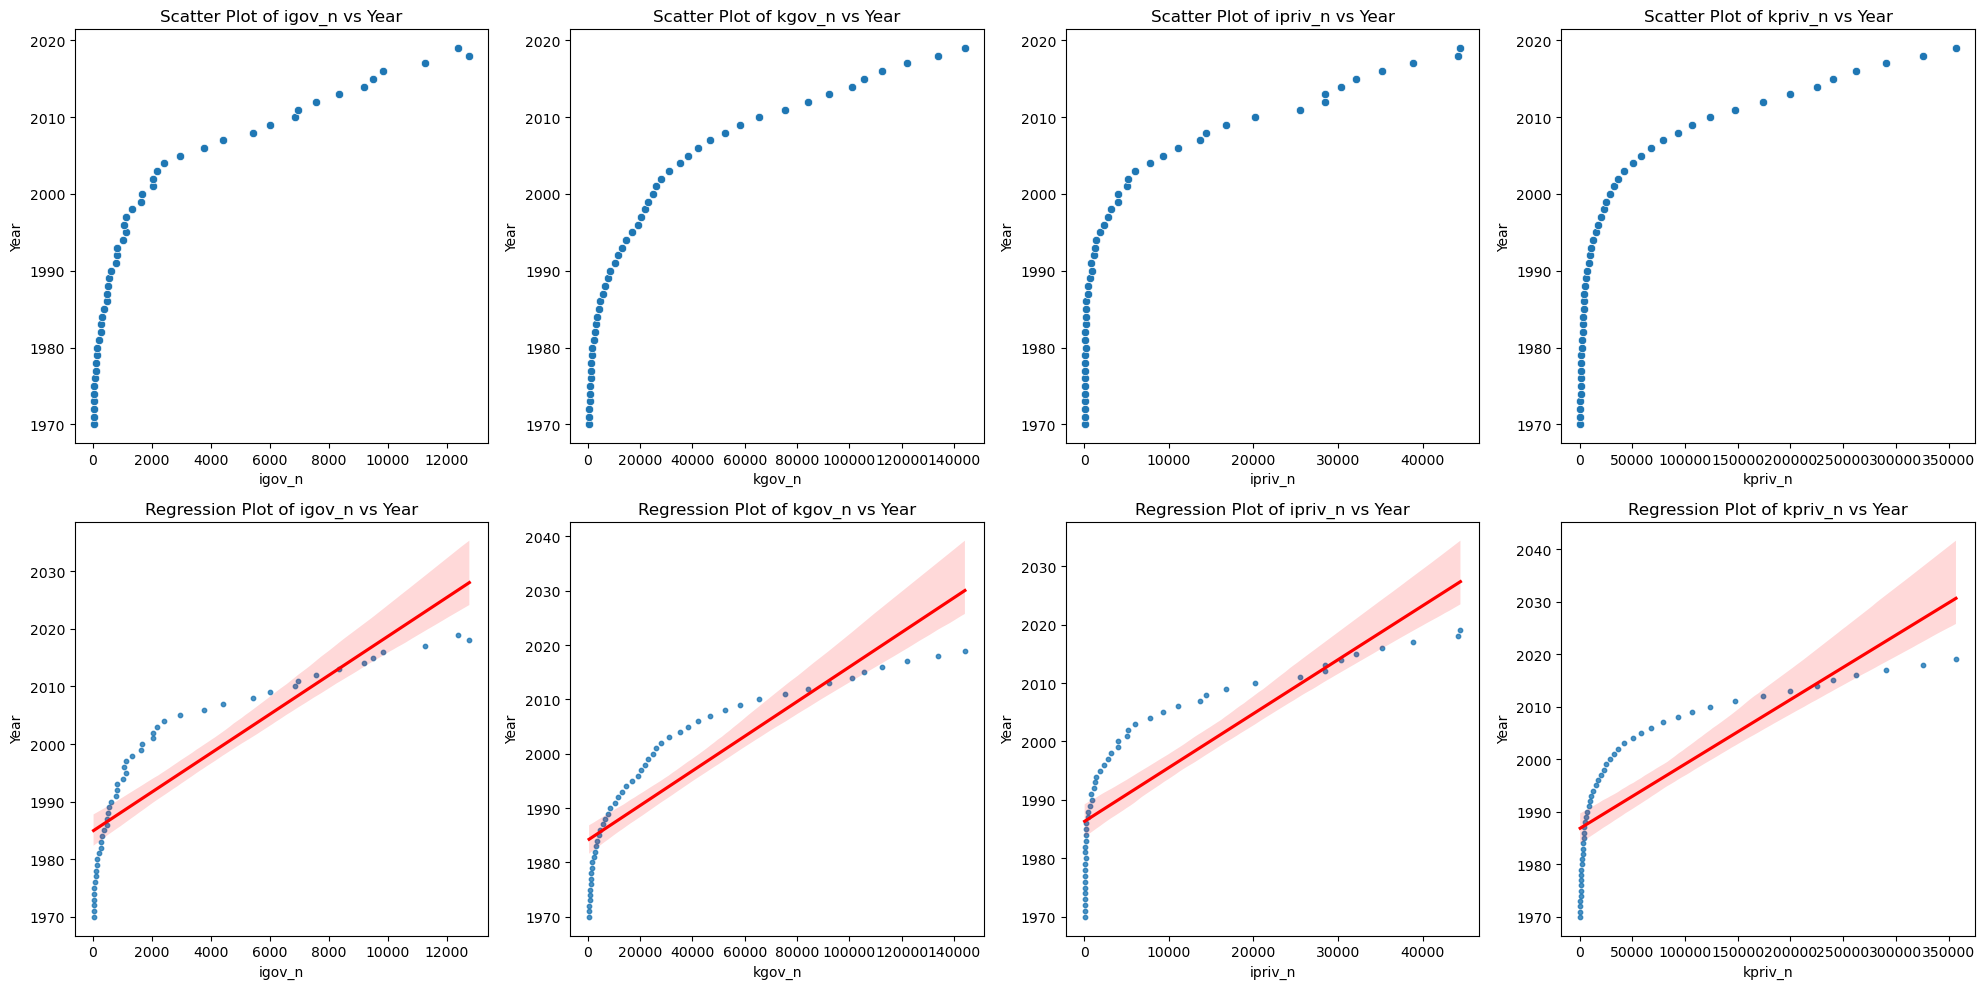

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Assuming you're using pandas for `df_india`

# Define figure and axes for horizontal layout
fig, axes = plt.subplots(2, len(targets), figsize=(5 * len(targets), 10))

for idx, target in enumerate(targets):
    # Scatter Plot
    sns.scatterplot(ax=axes[0, idx], data=df_india, x=target, y='year')
    axes[0, idx].set_title(f'Scatter Plot of {target} vs Year')
    axes[0, idx].set_xlabel(target)
    axes[0, idx].set_ylabel('Year')
    
    # Regression Plot
    sns.regplot(ax=axes[1, idx], data=df_india, x=target, y='year', scatter_kws={'s': 10}, line_kws={'color': 'red'})
    axes[1, idx].set_title(f'Regression Plot of {target} vs Year')
    axes[1, idx].set_xlabel(target)
    axes[1, idx].set_ylabel('Year')
    
    # Correlation
    correlation = df_india[target].corr(df_india['year'])
    print(f'Pearson Correlation Coefficient for {target}: {correlation:.2f}')

# Adjust layout for clarity
plt.tight_layout()
plt.show()


<Axes: >

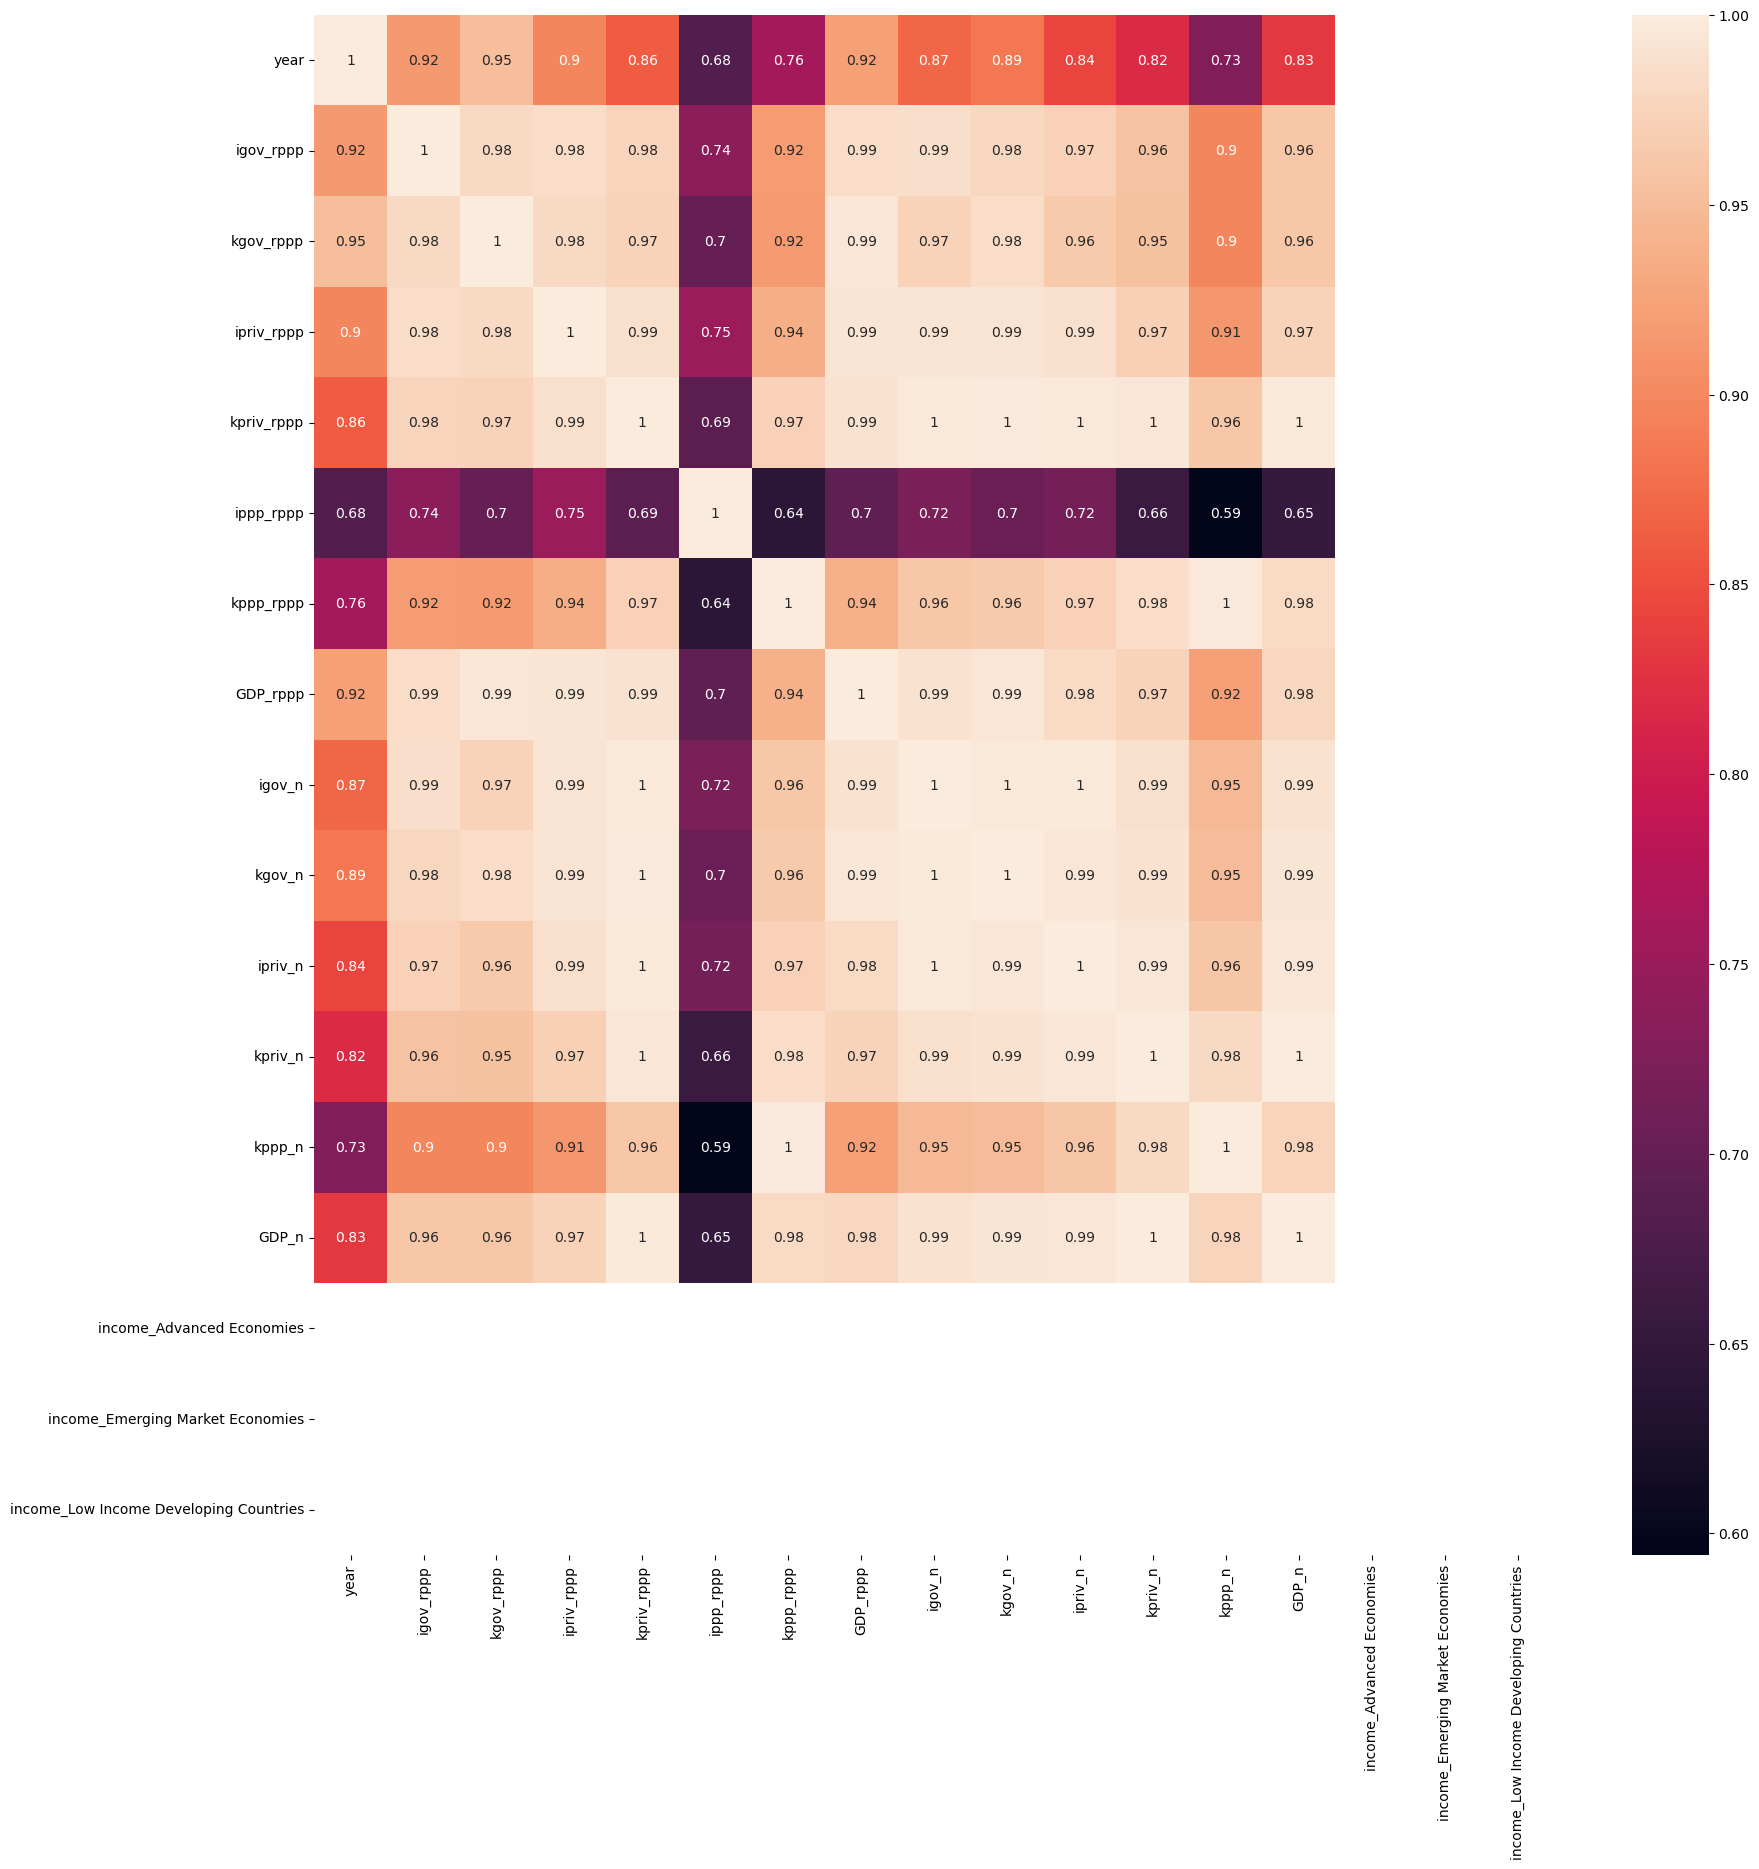

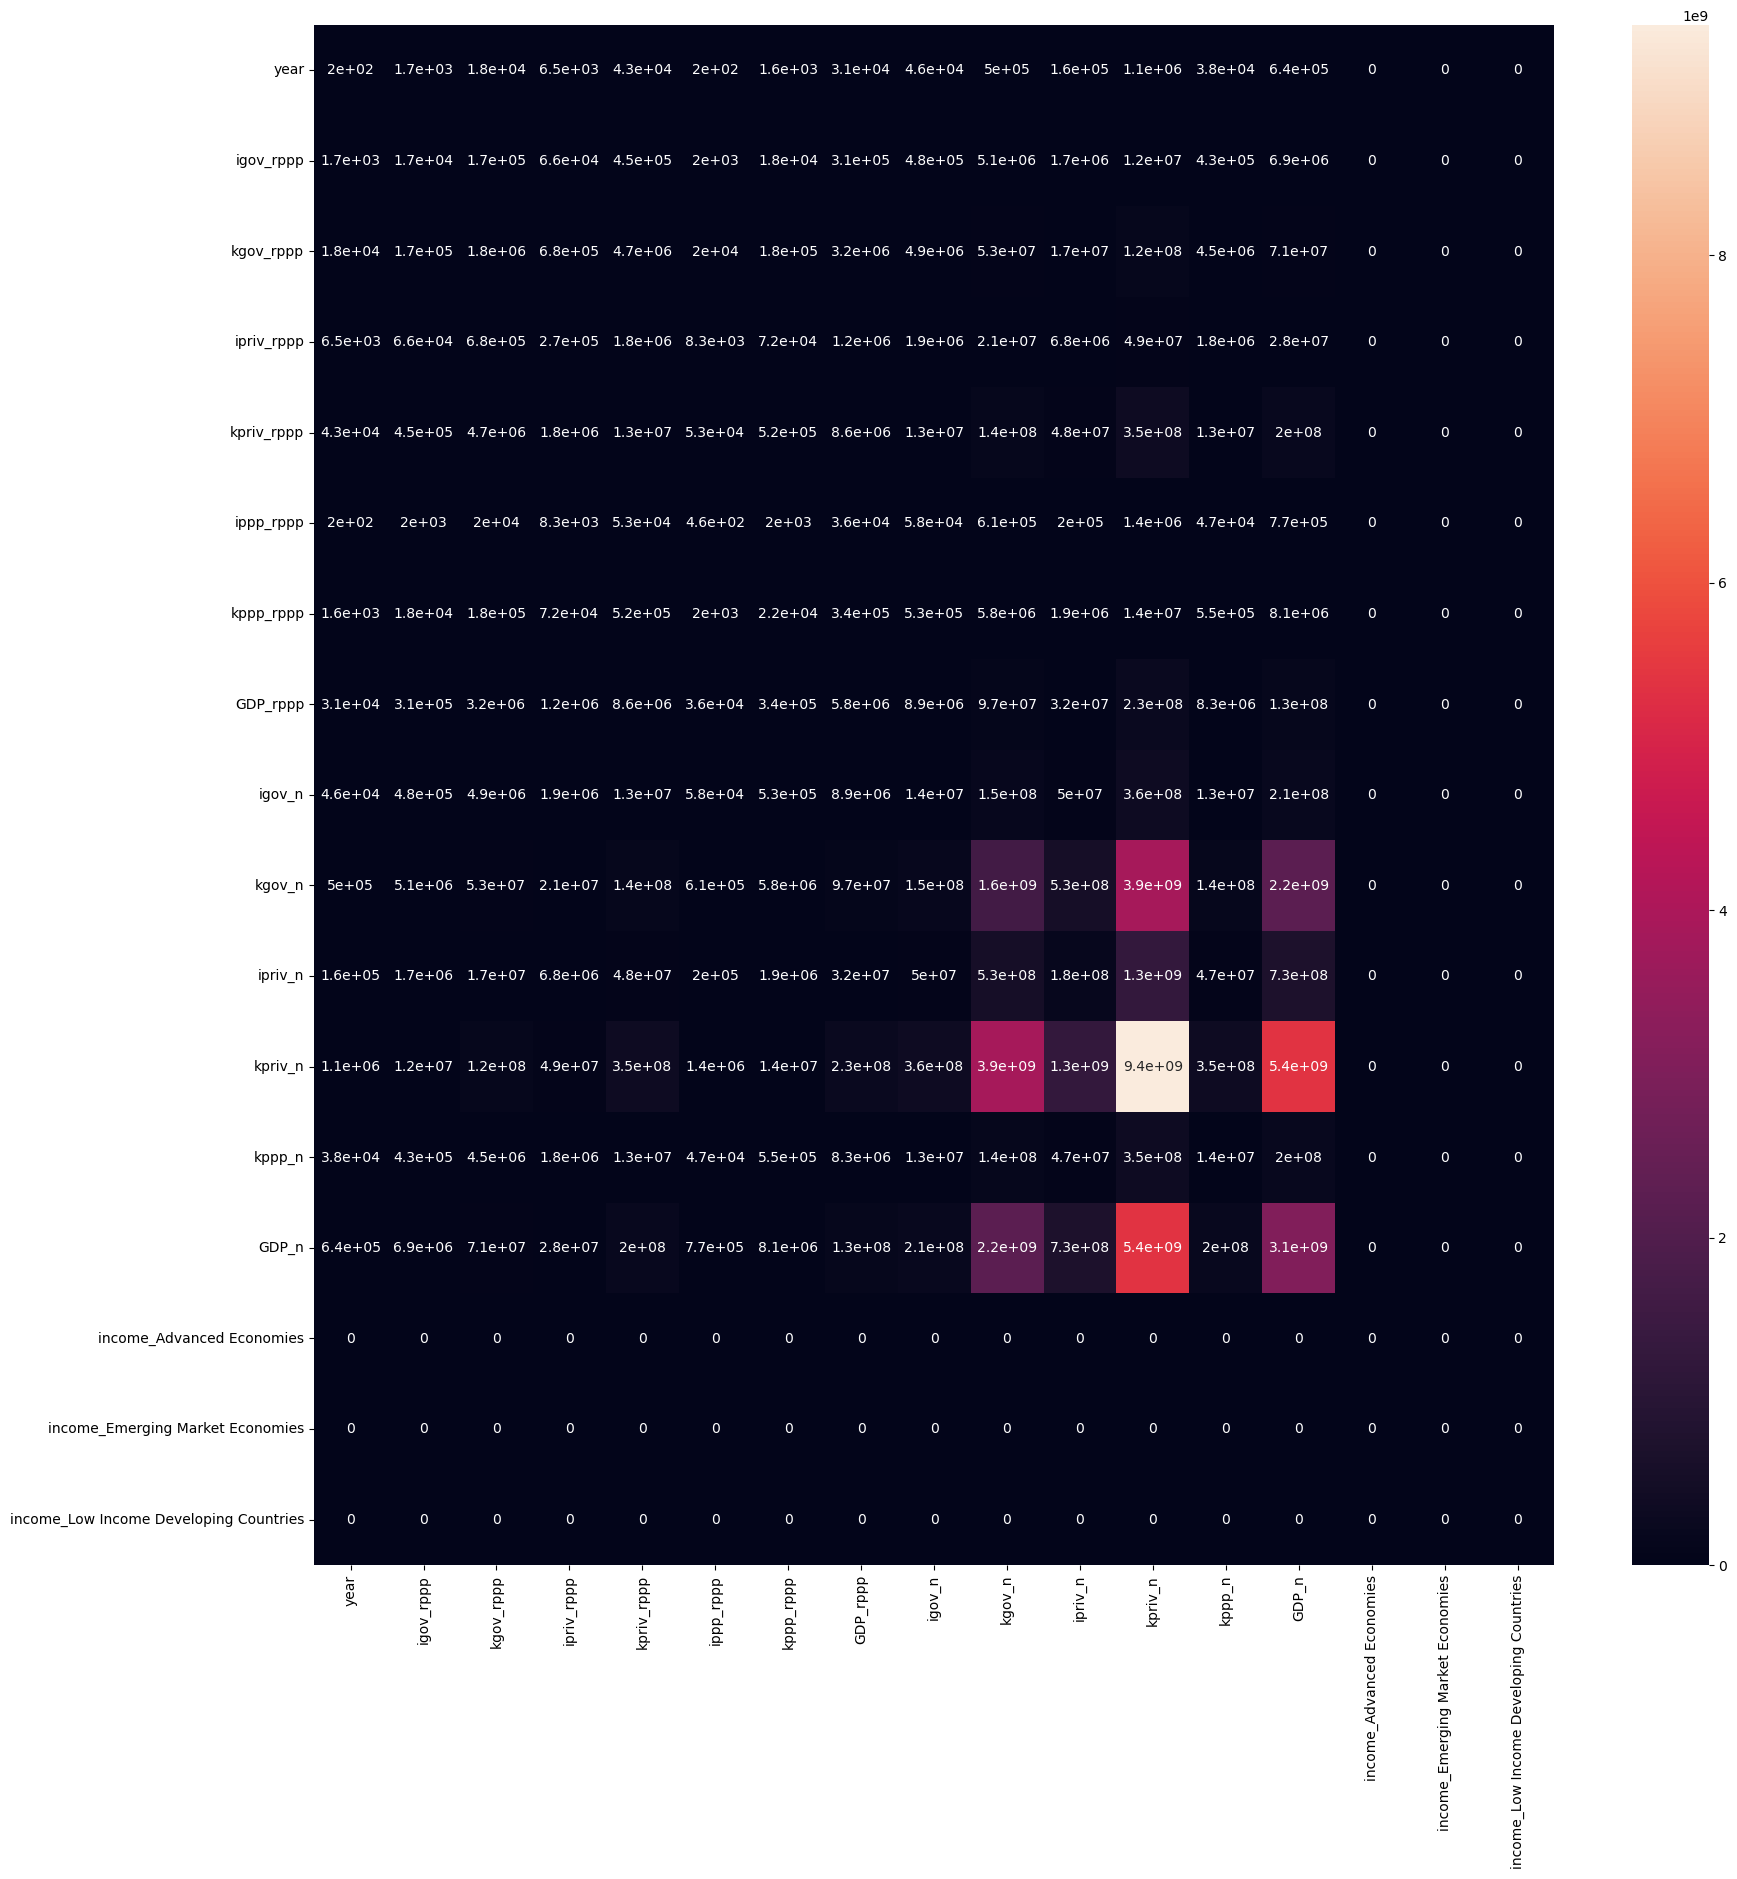

In [13]:
# correlation
plt.figure(figsize=(20, 20))
sns.heatmap(lin_df.corr(), annot=True)
# cavariance
plt.figure(figsize=(20, 20))
sns.heatmap(lin_df.cov(), annot=True)


In [20]:
# targets
target = 'igov_n'

In [30]:
x_= lin_df.drop([target, 'income_Advanced Economies', 'income_Emerging Market Economies', 'income_Low Income Developing Countries'], axis=1)
y= lin_df[target]



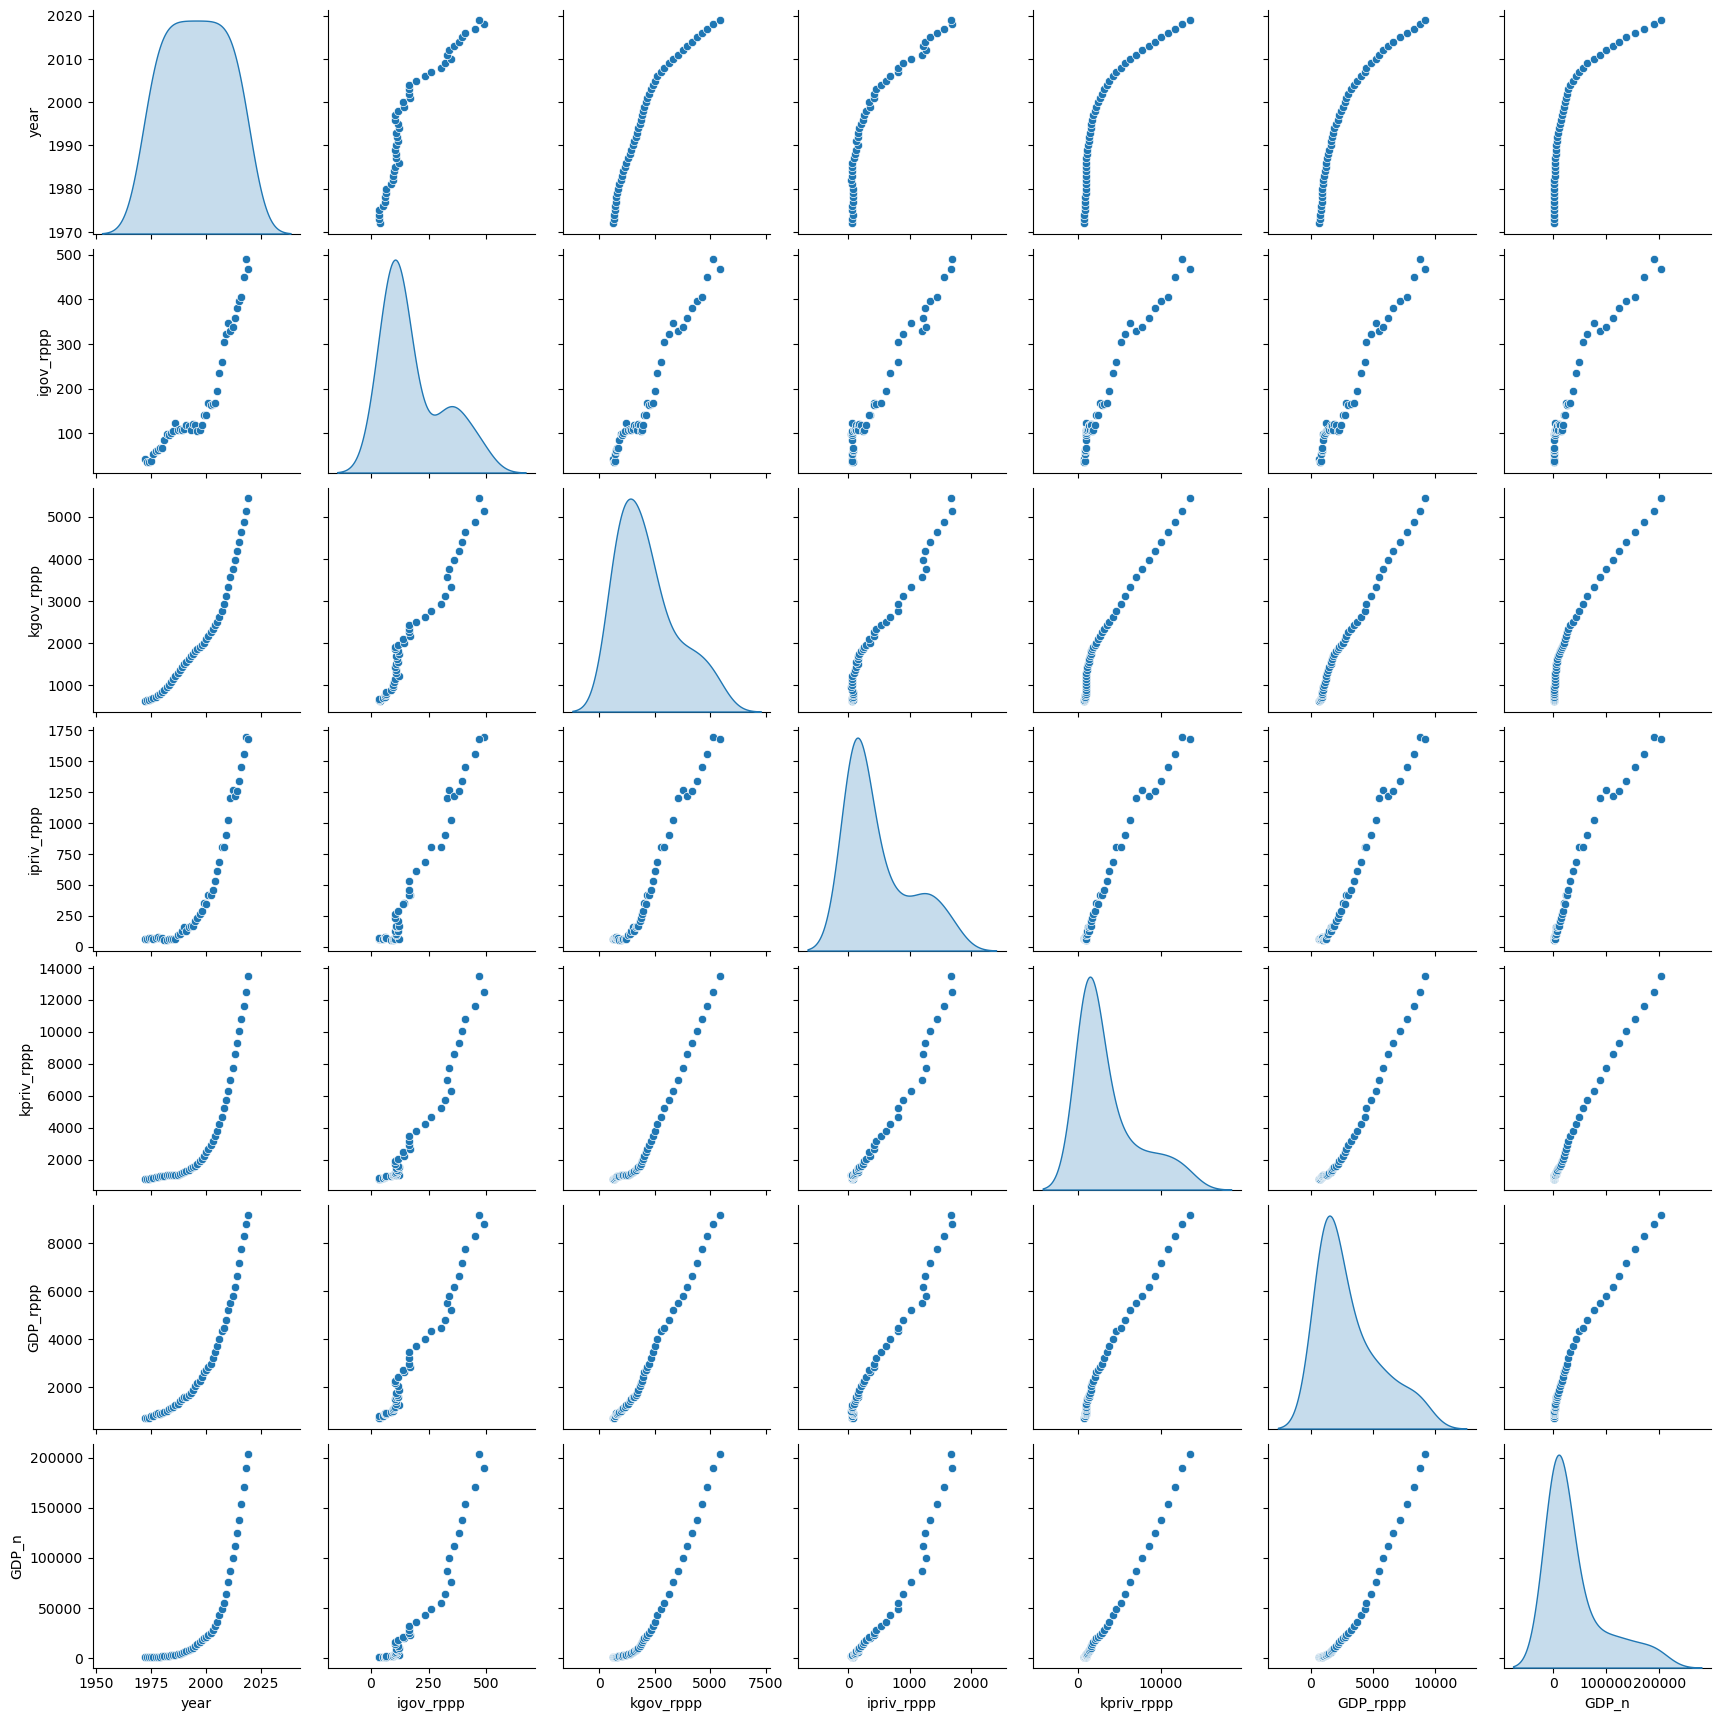

In [22]:
sns.pairplot(x_, diag_kind='kde')

Eigenvalues:  [1.42957972e+10 2.82557816e+07 2.38446976e+06 1.15306730e+06
 2.48217387e+05 2.54395052e+04 1.11759666e+04 1.66094653e+03
 2.12821083e+02 7.26941142e+01 1.36454240e+01 2.01274015e-01
 1.05003880e+00]
Eigenvectors:  [[-9.71081287e-05  1.38587278e-03 -7.21444221e-04 -1.17903363e-03
  -2.55601854e-04  2.84515168e-03  1.71497254e-02 -4.06842420e-03
   1.00226975e-02  4.23219729e-02 -2.38403465e-02 -8.85519705e-01
  -4.61597466e-01]
 [-1.04327157e-03  5.05871679e-03  2.04287928e-03  7.05288344e-03
  -9.04988073e-03  6.59886063e-02  1.20880625e-01 -1.14941372e-01
   8.66680632e-01 -4.03481233e-01  2.29312156e-01 -2.46352445e-02
   2.31512371e-02]
 [-1.07212864e-02  6.57702246e-02 -4.00620187e-02 -5.86412078e-02
   5.93740117e-03  5.80359788e-04  8.79501424e-01 -4.26094336e-01
  -1.86955808e-01 -1.18591335e-02  9.99568550e-03  1.29120523e-02
   6.41083686e-03]
 [-4.22581048e-03  1.90243752e-02  1.36748881e-02  4.37513001e-02
  -7.13113927e-03  1.05727413e-01 -6.43828874e-02  8.0

C:\Users\ASUS\AppData\Local\Temp\ipykernel_34280\3094205453.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(eigenvectors)).colors  # Dynamically generate colors


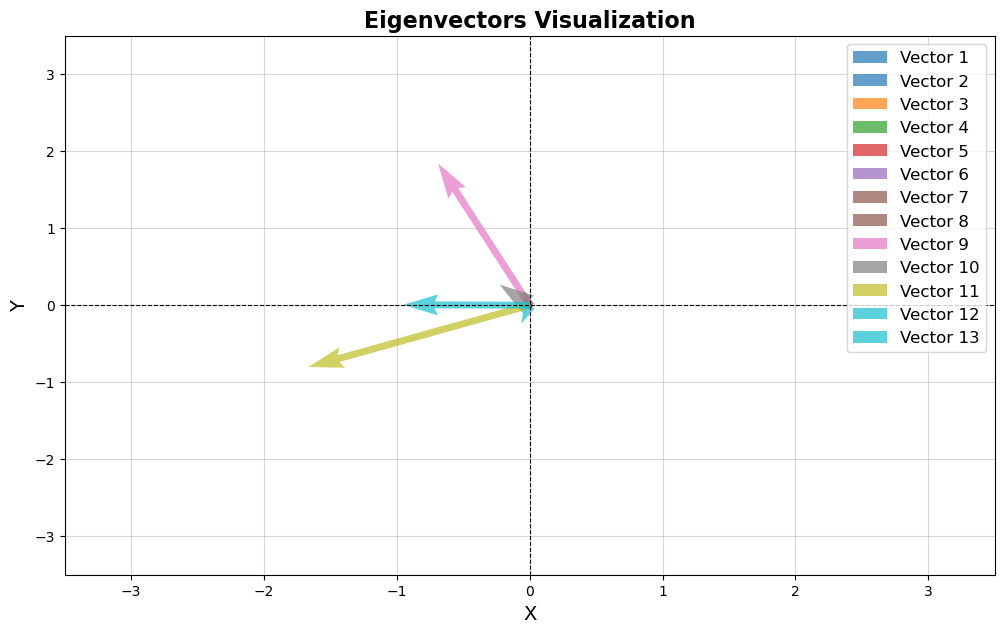

In [32]:
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(x_.cov())
print("Eigenvalues: ", eigenvalues)
print("Eigenvectors: ", eigenvectors)
plt.figure(figsize=(12, 7))

# Dynamic scaling for better visibility
scaling_factor = 2 / np.max(np.abs(eigenvectors))

origin = [0], [0]  # Origin point
colors = plt.cm.get_cmap('tab10', len(eigenvectors)).colors  # Dynamically generate colors

for i in range(len(eigenvectors)):
    plt.quiver(*origin, eigenvectors[i, 0] * scaling_factor, eigenvectors[i, 1] * scaling_factor, angles='xy', scale_units='xy', scale=1, color=colors[i], alpha=0.7, label=f'Vector {i+1}')

# Set axis limits dynamically
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')

plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.title('Eigenvectors Visualization', fontsize=16, weight='bold')
plt.legend(loc='upper right', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

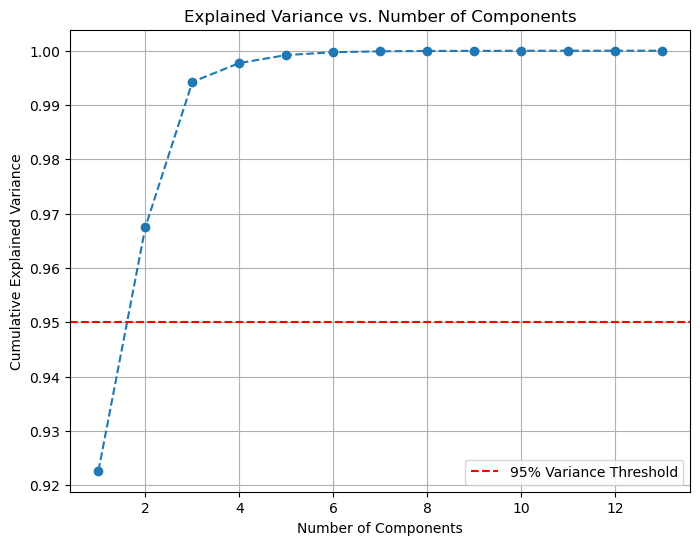

Optimal number of components: 2


In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Scaling the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_)

pca = PCA()
pca.fit(x_scaled)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.legend()
plt.show()

# Print the optimal number of components to retain 95% variance
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components: {optimal_components}")


In [41]:
pca = PCA(n_components=optimal_components)
x_pca = pca.fit_transform(x_scaled)
# Extract eigenvectors and eigenvalues
# eigenvectors = pca.components_
# eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_ * 100

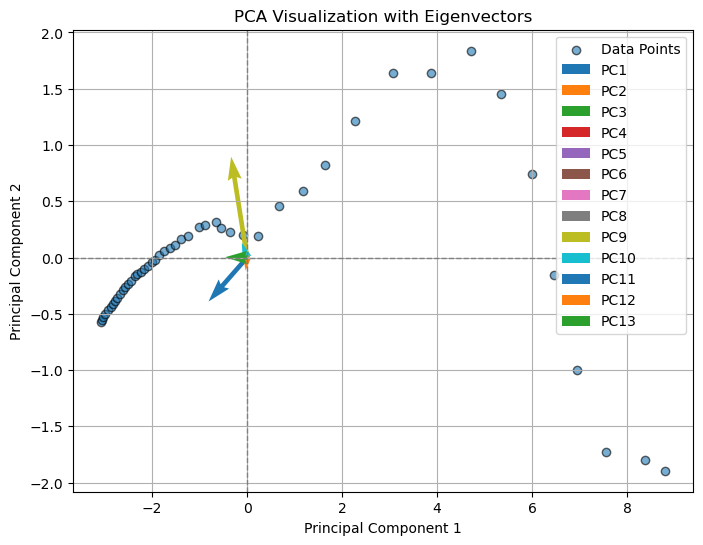

In [42]:
# Plot PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], alpha=0.6, edgecolor='k', label='Data Points')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)

# Overlay eigenvectors
origin = [0, 0]  # Origin for the vectors
for i, (vec, val) in enumerate(zip(eigenvectors, eigenvalues)):
    plt.quiver(
        origin[0], origin[1], 
        vec[0], vec[1], 
        angles='xy', scale_units='xy', scale=1, 
        color=f'C{i}', label=f'PC{i+1}'
    )

# Labels and legend
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization with Eigenvectors')
plt.legend()
plt.grid()
plt.show()

In [44]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
xt, xtest, yt, ytest = train_test_split(x_pca, y, test_size=0.1, random_state=42)
lr.fit(xt, yt)
y_pred = lr.predict(xtest)
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')


Mean Squared Error: 121830.5548569466
R2 Score: 0.9905013452983222


In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Define the targets
targets = ['igov_n', 'kgov_n', 'ipriv_n', 'kpriv_n']

# Function to create and apply the pipeline
def create_and_apply_pipeline(df_train, df_missing, features, targets, model_type='linear'):
    predictions = {}  # Dictionary to store predictions for each target
    
    for target in targets:
        # Define X and y
        x_ = df_train[features]
        y = df_train[target]
        
        # Define pipeline
        if model_type == 'linear':
            regressor = LinearRegression()
        elif model_type == 'random_forest':
            regressor = RandomForestRegressor(n_estimators=100, random_state=42)
        elif model_type == 'polynomial':
            regressor = Pipeline([
                ('poly', PolynomialFeatures(degree=2)),
                ('linear', LinearRegression())
            ])
        elif model_type == 'logarithmic':
            regressor = LinearRegression()
            y = np.log1p(y)  # Apply log transformation
        elif model_type == 'exponential':
            regressor = LinearRegression()
            y = np.expm1(y)  # Apply exponential transformation
        else:
            raise ValueError("Invalid model_type specified")
        
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA()),  # PCA without fixed components initially
            ('regressor', regressor)
        ])
        
        # Fit PCA to find optimal components for 95% explained variance
        x_scaled = StandardScaler().fit_transform(x_)
        pca_temp = PCA().fit(x_scaled)
        cumulative_variance = np.cumsum(pca_temp.explained_variance_ratio_)
        optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
        
        # Update pipeline with optimal PCA components
        pipeline.set_params(pca__n_components=optimal_components)
        
        # Train-test split
        xt, xtest, yt, ytest = train_test_split(x_, y, test_size=0.1, random_state=42)
        
        # Fit the pipeline
        pipeline.fit(xt, yt)
        
        # Evaluate
        y_pred = pipeline.predict(xtest)
        if model_type == 'logarithmic':
            y_pred = np.expm1(y_pred)  # Inverse log transform
        elif model_type == 'exponential':
            y_pred = np.log1p(y_pred)  # Inverse exponential transform
        
        mse = mean_squared_error(ytest, y_pred)
        r2 = r2_score(ytest, y_pred)
        print(f'Target: {target} | MSE: {mse:.4f} | R2: {r2:.4f}')
        
        # Predict missing values
        x_missing = df_missing[features]
        predictions[target] = pipeline.predict(x_missing)
        if model_type == 'logarithmic':
            predictions[target] = np.expm1(predictions[target])  # Inverse log transform
        elif model_type == 'exponential':
            predictions[target] = np.log1p(predictions[target])  # Inverse exponential transform
    
    # Fill the missing values in the original DataFrame
    for target in targets:
        df_missing[target] = predictions[target]
    
    return df_missing

# Drop columns that are not features
drop_cols = ['index', 'isocode', 'ifscode', 'country'] + targets

# Ensure features are selected properly
features = [col for col in df_india_.columns if col not in drop_cols]

# Train and predict
df_train = df_india.dropna().copy()
df_missing = df_india_12_rows.copy()

# Apply the pipeline with different models
df_filled_linear = create_and_apply_pipeline(df_train, df_missing, features, targets, model_type='linear')
df_filled_rf = create_and_apply_pipeline(df_train, df_missing, features, targets, model_type='random_forest')
df_filled_poly = create_and_apply_pipeline(df_train, df_missing, features, targets, model_type='polynomial')
df_filled_log = create_and_apply_pipeline(df_train, df_missing, features, targets, model_type='logarithmic')
# df_filled_exp = create_and_apply_pipeline(df_train, df_missing, features, targets, model_type='exponential')

# Result
print("Missing values filled (Linear Regression):")
print(df_filled_linear[targets].head(12))
print("Missing values filled (Random Forest):")
print(df_filled_rf[targets].head(12))
print("Missing values filled (Polynomial Regression):")
print(df_filled_poly[targets].head(12))
print("Missing values filled (Logarithmic Regression):")
print(df_filled_log[targets].head(12))
print("Missing values filled (Exponential Regression):")
# print(df_filled_exp[targets].head(12))


Target: igov_n | MSE: 189310.0741 | R2: 0.9855
Target: kgov_n | MSE: 6094310.2753 | R2: 0.9959
Target: ipriv_n | MSE: 1823836.9430 | R2: 0.9879
Target: kpriv_n | MSE: 32756670.2392 | R2: 0.9960
Target: igov_n | MSE: 5663.0889 | R2: 0.9996
Target: kgov_n | MSE: 2761723.3046 | R2: 0.9981
Target: ipriv_n | MSE: 1226894.4383 | R2: 0.9919
Target: kpriv_n | MSE: 34936932.5613 | R2: 0.9957
Target: igov_n | MSE: 145340.7368 | R2: 0.9888
Target: kgov_n | MSE: 3669175.9603 | R2: 0.9975
Target: ipriv_n | MSE: 288065.5740 | R2: 0.9981
Target: kpriv_n | MSE: 15425466.3911 | R2: 0.9981
Target: igov_n | MSE: 58533049.7174 | R2: -30884377.5645
Target: kgov_n | MSE: 6991814384.6425 | R2: -3808832963.5364
Target: ipriv_n | MSE: 850583841.1478 | R2: -209699201.4715
Target: kpriv_n | MSE: 33447476002.6065 | R2: -11358687095.5970
Missing values filled (Linear Regression):
        igov_n       kgov_n     ipriv_n      kpriv_n
0   117.639290  1729.285410  129.287044  1626.262135
1   120.808407  1772.538117  1

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

targets = ['igov_n', 'kgov_n', 'ipriv_n', 'kpriv_n']

def create_and_apply_pipeline(df_train, df_missing, features, targets, model_type='linear'):
    predictions = {}
    model_metrics = []

    for target in targets:
        x_ = df_train[features]
        y = df_train[target]

        if model_type == 'linear':
            regressor = LinearRegression()
        elif model_type == 'random_forest':
            regressor = RandomForestRegressor(n_estimators=100, random_state=42)
        elif model_type == 'polynomial':
            regressor = Pipeline([
                ('poly', PolynomialFeatures(degree=2)),
                ('linear', LinearRegression())
            ])
        elif model_type == 'gradient_boosting':
            regressor = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
        elif model_type == 'huber':
            regressor = HuberRegressor(epsilon=1.35)
        else:
            raise ValueError("Invalid model_type specified")

        if model_type in ['random_forest', 'gradient_boosting']:
            pipeline = Pipeline([
                ('regressor', regressor)
            ])
        else:
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('pca', PCA()),
                ('regressor', regressor)
            ])
            
            x_scaled = StandardScaler().fit_transform(x_)
            pca_temp = PCA().fit(x_scaled)
            optimal_components = np.argmax(np.cumsum(pca_temp.explained_variance_ratio_) >= 0.95) + 1
            pipeline.set_params(pca__n_components=optimal_components)
        
        xt, xtest, yt, ytest = train_test_split(x_, y, test_size=0.1, random_state=42)
        pipeline.fit(xt, yt)
        y_pred = pipeline.predict(xtest)
        y_pred = np.maximum(0, y_pred)  # Clip to avoid negative values

        mse = mean_squared_error(ytest, y_pred)
        r2 = r2_score(ytest, y_pred)
        model_metrics.append({'Target': target, 'Model': model_type, 'MSE': mse, 'R2': r2})
        
        x_missing = df_missing[features]
        predictions[target] = np.maximum(0, pipeline.predict(x_missing))  # Clip again for final predictions
    
    df_filled = df_missing.copy()
    for target in targets:
        df_filled[target] = predictions[target]
    
    return df_filled, pd.DataFrame(model_metrics)


drop_cols = ['index', 'isocode', 'ifscode', 'country'] + targets
features = [col for col in df_india_.columns if col not in drop_cols]

df_train = df_india.dropna().sort_values(by='year').copy()
df_missing = df_india_12_rows.copy()

df_filled_linear, metrics_linear = create_and_apply_pipeline(df_train, df_missing, features, targets, model_type='linear')
df_filled_rf, metrics_rf = create_and_apply_pipeline(df_train, df_missing, features, targets, model_type='random_forest')
df_filled_poly, metrics_poly = create_and_apply_pipeline(df_train, df_missing, features, targets, model_type='polynomial')
df_filled_gb, metrics_gb = create_and_apply_pipeline(df_train, df_missing, features, targets, model_type='gradient_boosting')
df_filled_huber, metrics_huber = create_and_apply_pipeline(df_train, df_missing, features, targets, model_type='huber')

all_metrics = pd.concat([metrics_linear, metrics_rf, metrics_poly, metrics_gb, metrics_huber])

print("Model Metrics Comparison:")
print(all_metrics)


Target: igov_n | Model: linear | MSE: 70891.8664 | R2: 0.9648
Target: kgov_n | Model: linear | MSE: 1887479.0474 | R2: 0.9929
Target: ipriv_n | Model: linear | MSE: 2435543.6534 | R2: 0.8655
Target: kpriv_n | Model: linear | MSE: 112608000.7532 | R2: 0.8338
Target: igov_n | Model: random_forest | MSE: 8542.3722 | R2: 0.9958
Target: kgov_n | Model: random_forest | MSE: 167524.4662 | R2: 0.9994
Target: ipriv_n | Model: random_forest | MSE: 36304.7005 | R2: 0.9980
Target: kpriv_n | Model: random_forest | MSE: 4194791.2214 | R2: 0.9938
Target: igov_n | Model: polynomial | MSE: 25232.9269 | R2: 0.9875
Target: kgov_n | Model: polynomial | MSE: 5757201.6317 | R2: 0.9783
Target: ipriv_n | Model: polynomial | MSE: 64557.9057 | R2: 0.9964
Target: kpriv_n | Model: polynomial | MSE: 4479196.9707 | R2: 0.9934
Target: igov_n | Model: logarithmic | MSE: 689099.4404 | R2: -254030.9388
Target: kgov_n | Model: logarithmic | MSE: 108624016.3999 | R2: -46933143.2978
Target: ipriv_n | Model: logarithmic | 

In [80]:
print("Missing values filled (Linear Regression):")
print(df_filled_linear[targets].head(12))


Missing values filled (Linear Regression):
        igov_n       kgov_n      ipriv_n       kpriv_n
0  -829.151139 -6525.795904 -3748.410666 -21185.382024
1  -794.467136 -6168.397145 -3635.151205 -20579.604830
2  -759.471408 -5807.630451 -3520.793703 -19965.949347
3  -721.189577 -5411.008321 -3394.680128 -19263.749542
4  -681.309167 -4996.966641 -3262.859401 -18518.833758
5  -649.773242 -4674.096433 -3160.954349 -18000.680455
6  -615.957575 -4326.342935 -3050.889125 -17420.966497
7  -573.826866 -3887.852409 -2911.071761 -16617.051554
8  -533.700380 -3471.373638 -2778.498175 -15869.377962
9  -486.291099 -2975.439403 -2619.874829 -14925.605999
10 -459.234097 -2699.215220 -2532.849224 -14493.386080
11 -405.874115 -2142.415480 -2355.027042 -13452.759182


In [81]:
print("Missing values filled (Random Forest):")
print(df_filled_rf[targets].head(12))


Missing values filled (Random Forest):
       igov_n      kgov_n    ipriv_n     kpriv_n
0   38.203924  535.964573  52.089237  603.473837
1   38.203924  535.964573  52.089237  603.473837
2   38.203924  535.964573  52.089237  603.473837
3   38.203924  535.964573  52.089237  603.473837
4   38.203924  535.964573  52.089237  603.473837
5   38.203924  535.964573  52.089237  603.473837
6   38.203924  535.964573  52.089237  603.473837
7   29.143583  501.597971  52.089237  603.473837
8   29.143583  501.597971  52.089237  603.473837
9   27.719516  509.455474  52.217361  610.603291
10  29.143583  501.597971  52.089237  603.473837
11  31.070538  522.819777  54.577685  636.067031


In [82]:
print("Missing values filled (Polynomial Regression):")
print(df_filled_poly[targets].head(12))


Missing values filled (Polynomial Regression):
       igov_n       kgov_n     ipriv_n      kpriv_n
0  -53.729201   933.637341  247.618471   345.381090
1  -39.464794   859.952603  211.281718   367.248304
2  -22.286697   852.711753  183.840231   437.124293
3  -43.926342   379.317608  126.226667    98.337849
4  -73.699079  -171.103851   66.693588  -312.241867
5    9.993378   750.536274  118.599453   533.881636
6   62.388093  1294.788909  146.080094  1049.303831
7   35.902688   863.675885  106.136674   729.756524
8   35.611605   765.364756   89.557826   691.781782
9  -10.511820   105.408466   34.869192   179.914931
10  23.572803   474.020508   49.162613   566.435730
11  29.844179   501.634857   53.283203   610.031555


In [83]:
print("Missing values filled (Logarithmic Regression):")
print(df_filled_log[targets].head(12))

Missing values filled (Logarithmic Regression):
        igov_n       kgov_n     ipriv_n      kpriv_n
0   124.182349  1791.523942  127.578190  1642.651979
1   127.545839  1836.643502  131.991395  1689.992666
2   131.017186  1883.134101  136.579342  1738.959098
3   134.739303  1932.916210  141.536358  1791.767500
4   138.647143  1985.099506  146.781249  1847.423274
5   142.257793  2033.188367  151.660551  1898.426656
6   146.079008  2084.012833  156.861798  1952.659223
7   150.444063  2142.020417  162.851350  2015.318582
8   154.843781  2200.371444  168.935672  2078.470743
9   159.784199  2265.815272  175.826296  2150.054083
10  163.432675  2313.981788  180.947554  2202.046309
11  169.471303  2393.677908  189.498928  2289.708668


In [84]:

print("Missing values filled (Logarithmic Regression):")
print(df_filled_gb[targets].head(12))

Missing values filled (Logarithmic Regression):
       igov_n      kgov_n    ipriv_n     kpriv_n
0   23.572869  474.020539  49.923976  566.465052
1   23.572869  474.020539  49.923976  566.465052
2   23.572869  474.020539  49.923976  566.465052
3   23.572869  474.020539  49.923976  566.465052
4   23.572736  474.020539  48.992321  566.462323
5   23.572736  474.020539  48.992321  566.462323
6   23.572736  474.020539  48.992321  566.462323
7   23.572818  474.020539  49.162487  566.436016
8   23.572818  474.020539  49.162487  566.436016
9   24.134182  476.943272  51.378636  574.272282
10  23.572818  474.020539  49.162487  566.436016
11  29.844218  501.634885  53.283400  610.032023


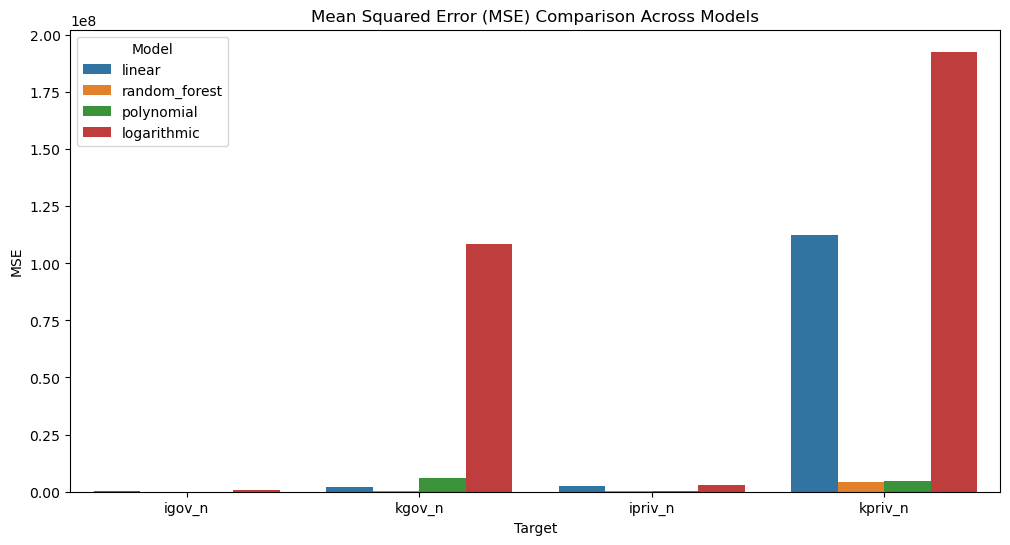

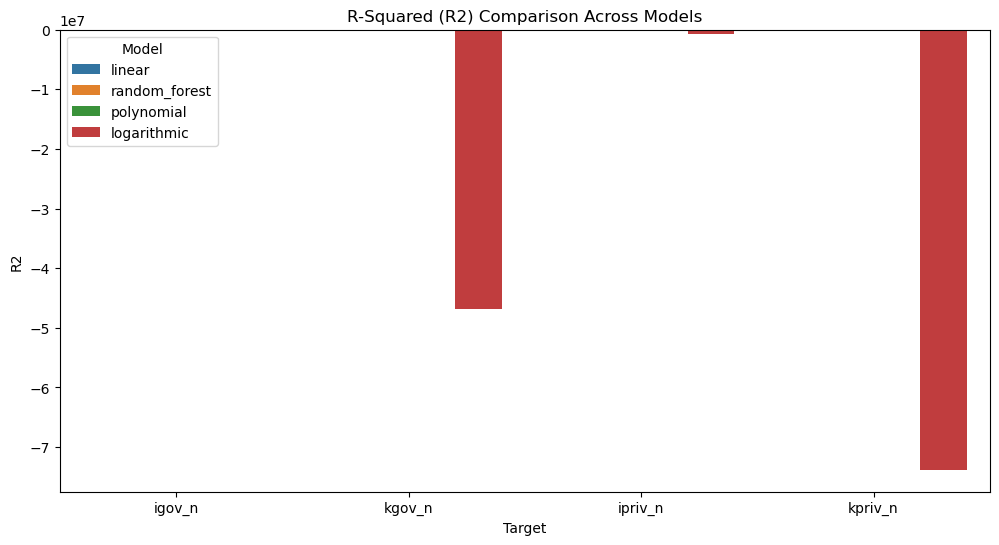

In [87]:
# Visualize the model metrics
plt.figure(figsize=(12, 6))
sns.barplot(x='Target', y='MSE', hue='Model', data=all_metrics)
plt.title('Mean Squared Error (MSE) Comparison Across Models')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Target', y='R2', hue='Model', data=all_metrics)
plt.title('R-Squared (R2) Comparison Across Models')
plt.show()

In [90]:
df_india.head(12)

,index,isocode,ifscode,country,year,igov_rppp,kgov_rppp,ipriv_rppp,kpriv_rppp,ippp_rppp,...,GDP_rppp,igov_n,kgov_n,ipriv_n,kpriv_n,kppp_n,GDP_n,income_Advanced Economies,income_Emerging Market Economies,income_Low Income Developing Countries
0,4560,IND,534,India,1960,21.343164,469.095490,44.512562,414.289185,0.0,...,447.601074,NaN,NaN,NaN,NaN,0.0,175.371170,False,True,False
1,4561,IND,534,India,1961,22.196890,478.444489,46.293060,440.248566,0.0,...,463.651825,NaN,NaN,NaN,NaN,0.0,185.017517,False,True,False
2,4562,IND,534,India,1962,23.084764,488.313263,48.144779,466.752167,0.0,...,479.111816,NaN,NaN,NaN,NaN,0.0,198.925888,False,True,False
3,4563,IND,534,India,1963,24.008156,498.718750,50.070572,493.835327,0.0,...,510.586517,NaN,NaN,NaN,NaN,0.0,228.274063,False,True,False
4,4564,IND,534,India,1964,24.968483,509.678558,52.073395,521.534241,0.0,...,548.536560,NaN,NaN,NaN,NaN,0.0,266.142548,False,True,False
5,4565,IND,534,India,1965,25.967222,521.210876,54.156330,549.886108,0.0,...,536.778503,NaN,NaN,NaN,NaN,0.0,280.976868,False,True,False
6,4566,IND,534,India,1966,27.005911,533.334656,56.322582,578.929016,0.0,...,534.711670,NaN,NaN,NaN,NaN,0.0,315.630280,False,True,False
7,4567,IND,534,India,1967,28.086147,546.069458,58.575485,608.702209,0.0,...,577.154785,NaN,NaN,NaN,NaN,0.0,370.512909,False,True,False
8,4568,IND,534,India,1968,29.209591,559.435547,60.918503,639.246033,0.0,...,606.548584,NaN,NaN,NaN,NaN,0.0,396.741211,False,True,False
9,4569,IND,534,India,1969,30.377974,573.454041,63.355240,670.601807,0.0,...,674.483032,NaN,NaN,NaN,NaN,0.0,438.366638,False,True,False


In [235]:


# Yearly exchange rates
exchange_rates = {
    1960: 4.76,
    1961: 4.76,
    1962: 4.76,
    1963: 4.76,
    1964: 4.76,
    1965: 4.76,
    1966: 6.36,
    1967: 7.5,
    1968: 7.5,
    1969: 7.5,
    1970: 7.5,
    1971: 7.49
}

df_india['igov_n'] = df_india.apply(lambda row: row['igov_rppp'] * exchange_rates[row['year']] / 10 if pd.isna(row['igov_n']) else row['igov_n'], axis=1)
df_india['kgov_n'] = df_india.apply(lambda row: row['kgov_rppp'] * exchange_rates[row['year']] / 10 if pd.isna(row['kgov_n']) else row['kgov_n'], axis=1)
df_india['ipriv_n'] = df_india.apply(lambda row: row['ipriv_rppp'] * exchange_rates[row['year']] / 10 if pd.isna(row['ipriv_n']) else row['ipriv_n'], axis=1)
df_india['kpriv_n'] = df_india.apply(lambda row: row['kpriv_rppp'] * exchange_rates[row['year']] / 10 if pd.isna(row['kpriv_n']) else row['kpriv_n'], axis=1)

# Printing the first 15 rows of relevant columns
print(df_india[['year','igov_rppp','igov_n','kgov_rppp','kgov_n','ipriv_rppp','ipriv_n','kpriv_rppp','kpriv_n']].head(15))



    year  igov_rppp     igov_n   kgov_rppp      kgov_n  ipriv_rppp    ipriv_n  \
0   1960  21.343164  10.159346  469.095490  223.289453   44.512562  21.187979   
1   1961  22.196890  10.565720  478.444489  227.739577   46.293060  22.035497   
2   1962  23.084764  10.988348  488.313263  232.437113   48.144779  22.916915   
3   1963  24.008156  11.427882  498.718750  237.390125   50.070572  23.833592   
4   1964  24.968483  11.884998  509.678558  242.606994   52.073395  24.786936   
5   1965  25.967222  12.360398  521.210876  248.096377   54.156330  25.778413   
6   1966  27.005911  17.175759  533.334656  339.200841   56.322582  35.821162   
7   1967  28.086147  21.064610  546.069458  409.552094   58.575485  43.931614   
8   1968  29.209591  21.907193  559.435547  419.576660   60.918503  45.688877   
9   1969  30.377974  22.783480  573.454041  430.090530   63.355240  47.516430   
10  1970  29.248245  23.572803  588.146851  474.020508   60.999119  49.162613   
11  1971  35.769066  29.8441

In [236]:
df_india.columns

Index(['index', 'isocode', 'ifscode', 'country', 'year', 'igov_rppp',
       'kgov_rppp', 'ipriv_rppp', 'kpriv_rppp', 'ippp_rppp', 'kppp_rppp',
       'GDP_rppp', 'igov_n', 'kgov_n', 'ipriv_n', 'kpriv_n', 'kppp_n', 'GDP_n',
       'income_Advanced Economies', 'income_Emerging Market Economies',
       'income_Low Income Developing Countries', 'igov_n_diff'],
      dtype='object')

In [241]:
df_india = df_india.drop(columns=['igov_n_diff'], axis=1)
df_india.isna().sum()

index                                     0
isocode                                   0
ifscode                                   0
country                                   0
year                                      0
igov_rppp                                 0
kgov_rppp                                 0
ipriv_rppp                                0
kpriv_rppp                                0
ippp_rppp                                 0
kppp_rppp                                 0
GDP_rppp                                  0
igov_n                                    0
kgov_n                                    0
ipriv_n                                   0
kpriv_n                                   0
kppp_n                                    0
GDP_n                                     0
income_Advanced Economies                 0
income_Emerging Market Economies          0
income_Low Income Developing Countries    0
dtype: int64

Target: GDP_n | Model: linear | MSE: 17578655.8457 | R2: 0.9911
Target: GDP_n | Model: random_forest | MSE: 7044512.8355 | R2: 0.9964
Target: GDP_n | Model: polynomial | MSE: 1287994.9608 | R2: 0.9994


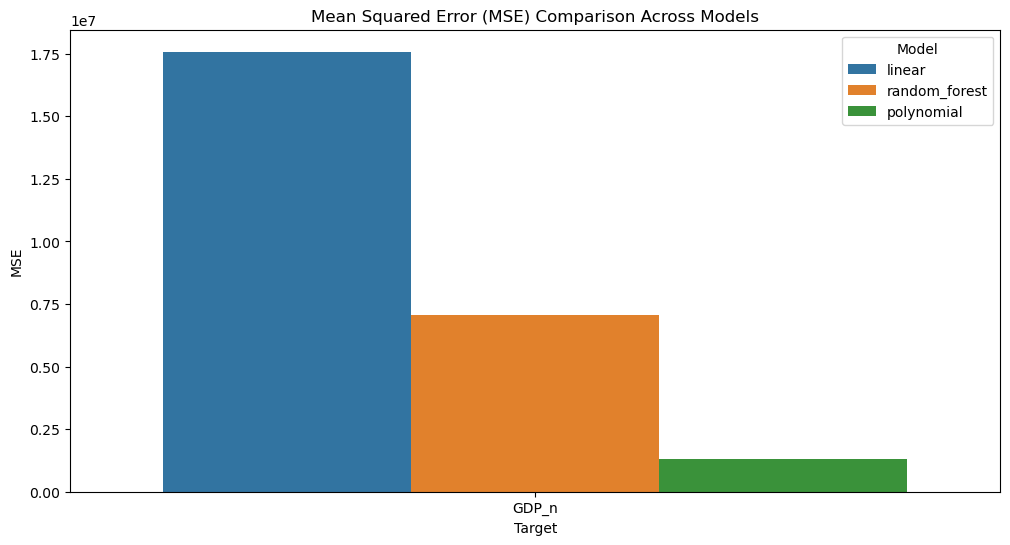

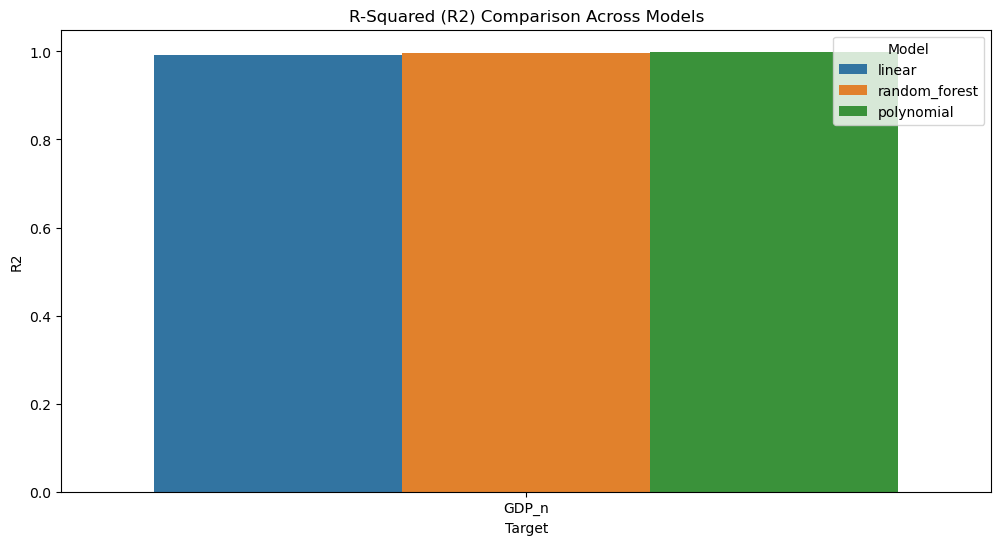

Model Metrics Comparison:
  Target          Model           MSE        R2
0  GDP_n         linear  1.757866e+07  0.991131
0  GDP_n  random_forest  7.044513e+06  0.996446
0  GDP_n     polynomial  1.287995e+06  0.999350


In [243]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Target variable
TARGET = 'GDP_n'

# Function to create and apply the pipeline
def create_and_apply_pipeline(df_train, features, target, model_type='linear'):
    model_metrics = []  # Store metrics for comparison

    # Define X and y
    x_ = df_train[features]
    y = df_train[target]
    
    # Define pipeline
    if model_type == 'linear':
        regressor = LinearRegression()
    elif model_type == 'random_forest':
        regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    elif model_type == 'polynomial':
        regressor = Pipeline([
            ('poly', PolynomialFeatures(degree=2)),
            ('linear', LinearRegression())
        ])
    elif model_type == 'logarithmic':
        regressor = LinearRegression()
        y = np.log1p(y)  # Apply log transformation
    else:
        raise ValueError("Invalid model_type specified")
    
    # Skip PCA for Random Forest and Polynomial models
    if model_type in ['random_forest', 'polynomial']:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', regressor)
        ])
    else:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA()),
            ('regressor', regressor)
        ])
        
        # Fit PCA to find optimal components for 95% explained variance
        x_scaled = StandardScaler().fit_transform(x_)
        pca_temp = PCA().fit(x_scaled)
        cumulative_variance = np.cumsum(pca_temp.explained_variance_ratio_)
        optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
        pipeline.set_params(pca__n_components=optimal_components)
    
    # Train-test split
    xt, xtest, yt, ytest = train_test_split(x_, y, test_size=0.1, random_state=42)
    
    # Fit the pipeline
    pipeline.fit(xt, yt)
    
    # Evaluate
    y_pred = pipeline.predict(xtest)
    if model_type == 'logarithmic':
        y_pred = np.expm1(y_pred)  # Inverse log transform
    
    mse = mean_squared_error(ytest, y_pred)
    r2 = r2_score(ytest, y_pred)
    model_metrics.append({'Target': target, 'Model': model_type, 'MSE': mse, 'R2': r2})
    
    print(f'Target: {target} | Model: {model_type} | MSE: {mse:.4f} | R2: {r2:.4f}')
    
    return pd.DataFrame(model_metrics)

# Drop columns that are not features
drop_cols = ['index', 'isocode', 'ifscode', 'country', 'income_Advanced Economies', 'income_Emerging Market Economies',
       'income_Low Income Developing Countries','igov_rppp','kgov_rppp', 'ipriv_rppp', 'kpriv_rppp', 'ippp_rppp', 'kppp_rppp','GDP_rppp']

# Ensure features are selected properly
features = [col for col in df_india.columns if col not in drop_cols and col != TARGET]

# Train and predict
df_train = df_india.drop(columns=drop_cols, axis=1).copy()

# Apply the pipeline with different models
metrics_linear = create_and_apply_pipeline(df_train, features, TARGET, model_type='linear')
metrics_rf = create_and_apply_pipeline(df_train, features, TARGET, model_type='random_forest')
metrics_poly = create_and_apply_pipeline(df_train, features, TARGET, model_type='polynomial')
# metrics_log = create_and_apply_pipeline(df_train, features, TARGET, model_type='logarithmic')

# Combine metrics for comparison
all_metrics = pd.concat([metrics_linear, metrics_rf, metrics_poly])

# Visualize the model metrics
plt.figure(figsize=(12, 6))
sns.barplot(x='Target', y='MSE', hue='Model', data=all_metrics)
plt.title('Mean Squared Error (MSE) Comparison Across Models')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Target', y='R2', hue='Model', data=all_metrics)
plt.title('R-Squared (R2) Comparison Across Models')
plt.show()

# Result
print("Model Metrics Comparison:")
print(all_metrics)


In [244]:
# Calculate eigenvalues and eigenvectors
cluster_df_india = df_india.drop(columns=drop_cols, axis=1).copy()
eigenvalues, eigenvectors = np.linalg.eig(cluster_df_india.cov())
print("Eigenvalues: ", eigenvalues)
print("Eigenvectors: ", eigenvectors)


Eigenvalues:  [1.25121362e+10 2.79190916e+07 1.94902819e+06 9.84334822e+05
 2.11896712e+01 5.41602110e+04 1.98456076e+05]
Eigenvectors:  [[-1.20892349e-04  1.82980892e-03 -1.24994962e-03  1.93937072e-03
   9.99989206e-01  3.57085258e-03  3.87161878e-04]
 [-3.14299667e-02  6.80931913e-02  8.50459261e-02 -1.70713120e-01
  -3.20618122e-03  9.71374875e-01  1.20084423e-01]
 [-3.41997963e-01  9.00762086e-01  1.12331088e-01  2.32232084e-01
  -1.84853821e-03 -3.55695025e-02 -6.20196434e-02]
 [-1.10642544e-01  1.03777454e-01  4.28112403e-01 -8.51502874e-01
   2.67955141e-03 -1.73729811e-01 -1.96116969e-01]
 [-8.08430752e-01 -4.00584213e-01  3.60117156e-01  2.15098643e-01
   6.44391500e-04 -4.16531015e-03  1.00012247e-01]
 [-2.97019477e-02 -1.12293262e-01 -2.25366567e-02  1.69019975e-01
  -3.44283177e-04  1.57963590e-01 -9.65649911e-01]
 [-4.64074645e-01  1.18483892e-02 -8.16501597e-01 -3.42095316e-01
  -4.20443102e-04 -1.00968113e-03 -2.80905604e-02]]


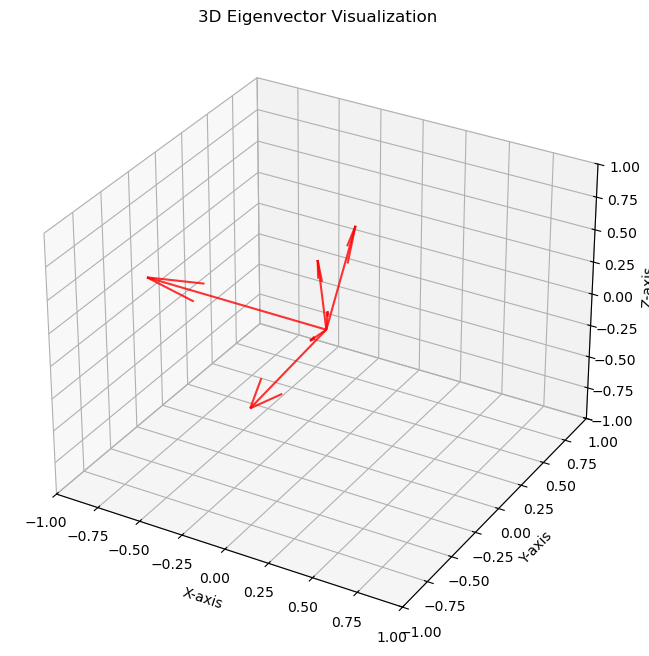

In [245]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# 3D Visualization of the first three eigenvectors
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract the first three eigenvectors
x, y, z = eigenvectors[:, 0], eigenvectors[:, 1], eigenvectors[:, 2]

# Plot the eigenvectors
ax.quiver(0, 0, 0, x, y, z, length=1, color='red', alpha=0.8)

# Set plot labels and limits
ax.set_title("3D Eigenvector Visualization")
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_34280\3053571606.py:7: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



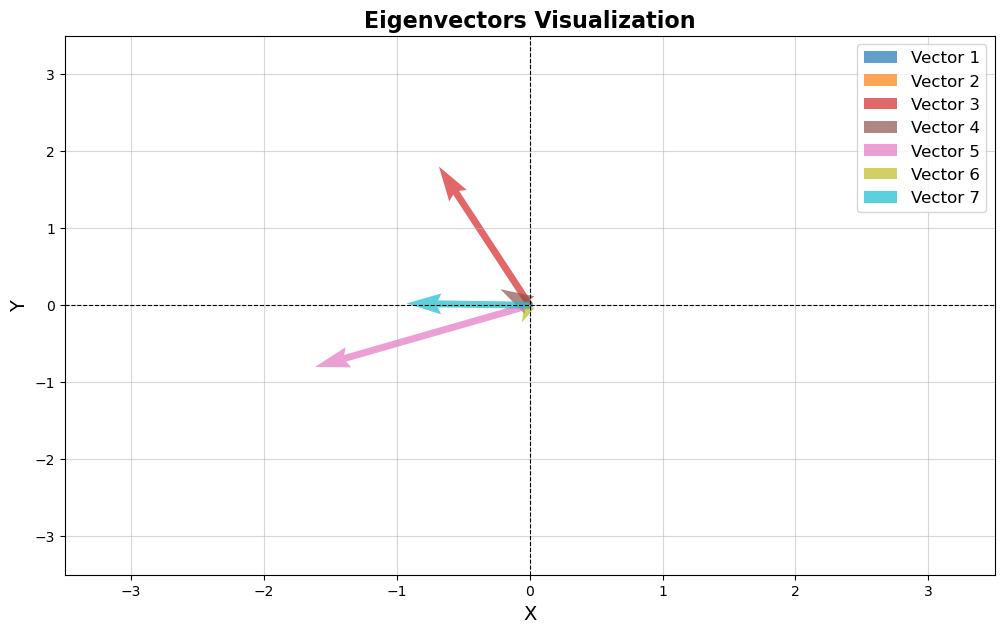

In [246]:
plt.figure(figsize=(12, 7))

# Dynamic scaling for better visibility
scaling_factor = 2 / np.max(np.abs(eigenvectors))

origin = [0], [0]  # Origin point
colors = plt.cm.get_cmap('tab10', len(eigenvectors)).colors  # Dynamically generate colors

for i in range(len(eigenvectors)):
    plt.quiver(*origin, eigenvectors[i, 0] * scaling_factor, eigenvectors[i, 1] * scaling_factor, angles='xy', scale_units='xy', scale=1, color=colors[i], alpha=0.7, label=f'Vector {i+1}')

# Set axis limits dynamically
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')

plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.title('Eigenvectors Visualization', fontsize=16, weight='bold')
plt.legend(loc='upper right', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

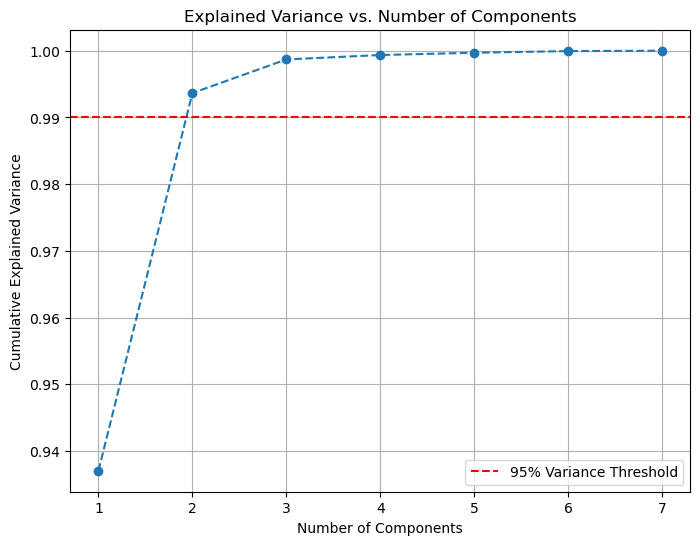

Optimal number of components: 2


In [247]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Scaling the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(cluster_df_india)

pca = PCA()
pca.fit(x_scaled)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.axhline(y=0.99, color='r', linestyle='--', label='95% Variance Threshold')
plt.legend()
plt.show()

# Print the optimal number of components to retain 95% variance
optimal_components = np.argmax(cumulative_variance >= 0.99) + 1
print(f"Optimal number of components: {optimal_components}")


In [249]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'x_scaled' contains the scaled input data (after scaling)
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x_scaled)

# Eigenvectors and explained variance ratio
eigenvectors = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_ * 100

# Create 3D scatter plot of PCA components
fig = go.Figure()

# Plot the 3D scatter plot for the PCA result
fig.add_trace(go.Scatter3d(
    x=x_pca[:, 0],
    y=x_pca[:, 1],
    z=x_pca[:, 2],
    mode='markers',
    marker=dict(size=5, color='blue', opacity=0.6),
    name='PCA Data Points'
))

# Plot the eigenvectors as arrows
for i in range(3):
    fig.add_trace(go.Cone(
        x=[0], y=[0], z=[0],  # Origin of the arrow (at the origin)
        u=[eigenvectors[i, 0]], v=[eigenvectors[i, 1]], w=[eigenvectors[i, 2]],  # Direction of the eigenvectors
        colorscale='Viridis', 
        showscale=False, 
        sizemode="scaled", 
        sizeref=1.5,  # Increased value for better visibility of eigenvectors
        opacity=0.8,
        name=f'Eigenvector {i+1}'
    ))

# Update layout and labels
fig.update_layout(
    title="PCA in 3D with Eigenvectors",
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    legend_title='Legend',
    template='plotly_dark'
)

# Show the plot
fig.show()


In [250]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'x_scaled' contains the scaled input data (after scaling)
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x_scaled)

# Eigenvectors and explained variance ratio
eigenvectors = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_ * 100

# Create 3D scatter plot of PCA components
fig = go.Figure()

# Plot the 3D scatter plot for the PCA result
fig.add_trace(go.Scatter3d(
    x=x_pca[:, 0],
    y=x_pca[:, 1],
    z=x_pca[:, 2],
    mode='markers',
    marker=dict(size=5, color='blue', opacity=0.6),
    name='PCA Data Points'
))

# Plot the eigenvectors as arrows using 3D axes
for i in range(3):
    fig.add_trace(go.Cone(
        x=[0], y=[0], z=[0],  # Origin of the arrow (at the origin)
        u=[eigenvectors[i, 0]], v=[eigenvectors[i, 1]], w=[eigenvectors[i, 2]],  # Direction of the eigenvectors
        colorscale='Viridis', 
        showscale=False, 
        sizemode="scaled", 
        sizeref=1.5,  # Adjust size reference for better visibility
        opacity=0.8,
        name=f'Eigenvector {i+1}'
    ))

# Update layout and labels for 3D axes
fig.update_layout(
    title="PCA in 3D with Eigenvectors",
    scene=dict(
        xaxis=dict(title='PC1', range=[min(x_pca[:, 0]), max(x_pca[:, 0])]),
        yaxis=dict(title='PC2', range=[min(x_pca[:, 1]), max(x_pca[:, 1])]),
        zaxis=dict(title='PC3', range=[min(x_pca[:, 2]), max(x_pca[:, 2])])
    ),
    legend_title='Legend',
    template='plotly_dark'
)

# Show the plot
fig.show()


In [251]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'x_scaled' contains the scaled input data (after scaling)
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x_scaled)

# Eigenvectors and explained variance ratio
eigenvectors = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_ * 100

# Create 3D scatter plot of PCA components
fig = go.Figure()

# Plot the 3D scatter plot for the PCA result
fig.add_trace(go.Scatter3d(
    x=x_pca[:, 0],
    y=x_pca[:, 1],
    z=x_pca[:, 2],
    mode='markers',
    marker=dict(size=5, color='blue', opacity=0.6),
    name='PCA Data Points'
))

# Plot the eigenvectors as 3D arrows
for i in range(3):
    fig.add_trace(go.Scatter3d(
        x=[0, eigenvectors[i, 0]],  # Start and end point for each eigenvector in X
        y=[0, eigenvectors[i, 1]],  # Start and end point for each eigenvector in Y
        z=[0, eigenvectors[i, 2]],  # Start and end point for each eigenvector in Z
        mode='lines+text',
        line=dict(color='red', width=5),  # Color and width for the eigenvector lines
        name=f'Eigenvector {i+1}',
        marker=dict(size=10)
    ))

# Update layout and labels for 3D axes
fig.update_layout(
    title="PCA in 3D with Eigenvectors",
    scene=dict(
        xaxis=dict(title='PC1', range=[min(x_pca[:, 0]), max(x_pca[:, 0])]),
        yaxis=dict(title='PC2', range=[min(x_pca[:, 1]), max(x_pca[:, 1])]),
        zaxis=dict(title='PC3', range=[min(x_pca[:, 2]), max(x_pca[:, 2])])
    ),
    legend_title='Legend',
)

# Show the plot
fig.show()


In [253]:
df_pca_india = pd.DataFrame(x_pca, columns=[f'PC{i+1}' for i in range(3)])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

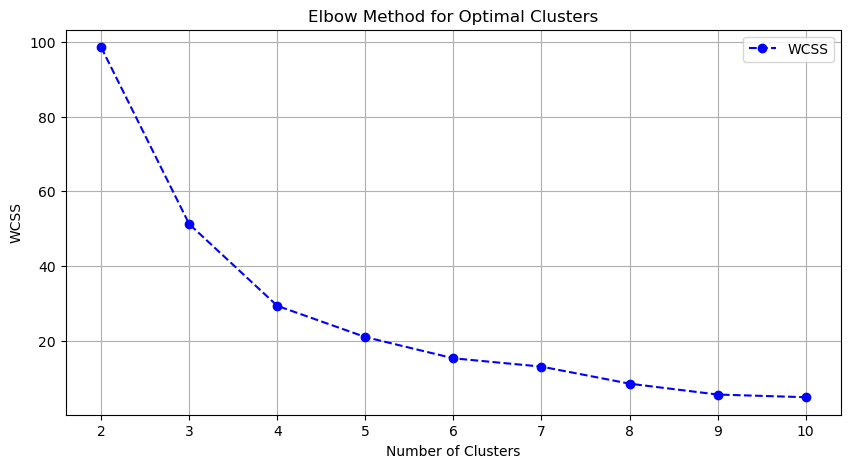

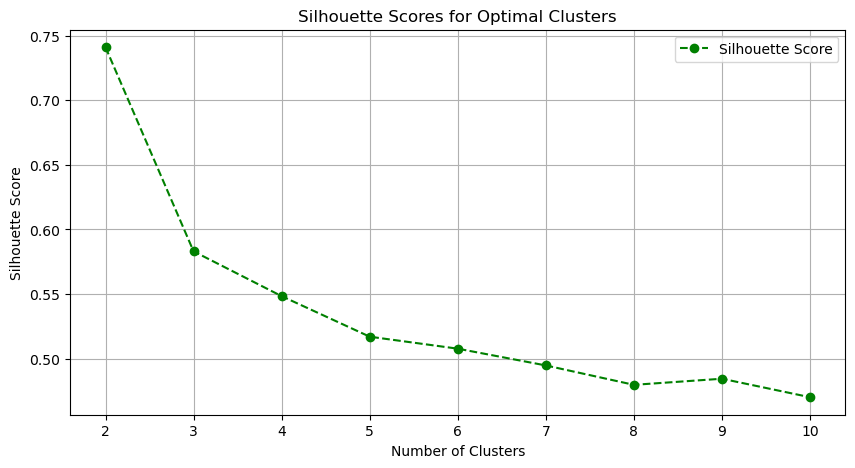

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



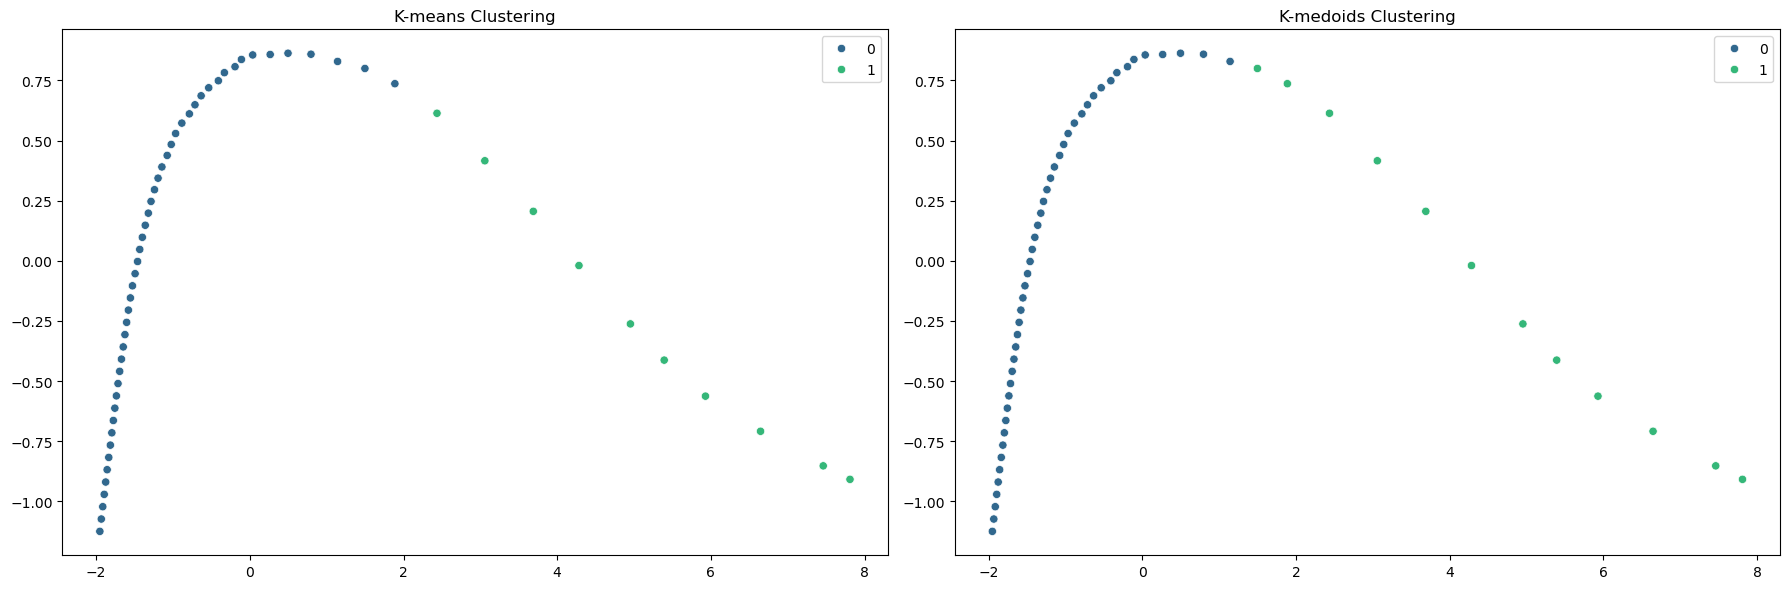

K-means Silhouette Score (Optimal): 0.7411
K-medoids Silhouette Score (Optimal): 0.7216


In [254]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming x_pca is the dataset reduced to 2D using PCA

# Elbow Method
wcss = []  # Within-cluster sum of squares
silhouette_scores = []  # Silhouette scores
clusters_range = range(2, 11)  # Test from 2 to 10 clusters

for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)  # Add WCSS
    silhouette_scores.append(silhouette_score(x_pca, kmeans.labels_))  # Add silhouette score

# Elbow Method Plot
plt.figure(figsize=(10, 5))
plt.plot(clusters_range, wcss, marker='o', linestyle='--', color='b', label='WCSS')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.xticks(clusters_range)
plt.legend()
plt.grid(True)
plt.show()

# Silhouette Scores Plot
plt.figure(figsize=(10, 5))
plt.plot(clusters_range, silhouette_scores, marker='o', linestyle='--', color='g', label='Silhouette Score')
plt.title("Silhouette Scores for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(clusters_range)
plt.legend()
plt.grid(True)
plt.show()

# Optimal Clusters from Elbow and Silhouette (example: choose 3)
optimal_clusters = 2

# Perform Clustering with Optimal Clusters
kmeans_opt = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans_opt.fit_predict(x_pca)

kmedoids_opt = KMedoids(n_clusters=optimal_clusters, random_state=42)
kmedoids_labels = kmedoids_opt.fit_predict(x_pca)

# Visualize Clustering Results with Cluster Labels
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# K-means plot
sns.scatterplot(ax=axes[0], x=x_pca[:, 0], y=x_pca[:, 1], hue=kmeans_labels, palette='viridis', legend='full')
axes[0].set_title('K-means Clustering')

# K-medoids plot
sns.scatterplot(ax=axes[1], x=x_pca[:, 0], y=x_pca[:, 1], hue=kmedoids_labels, palette='viridis', legend='full')
axes[1].set_title('K-medoids Clustering')

plt.tight_layout()
plt.show()

# Print silhouette scores for chosen clusters
kmeans_silhouette = silhouette_score(x_pca, kmeans_labels)
kmedoids_silhouette = silhouette_score(x_pca, kmedoids_labels)
print(f"K-means Silhouette Score (Optimal): {kmeans_silhouette:.4f}")
print(f"K-medoids Silhouette Score (Optimal): {kmedoids_silhouette:.4f}")


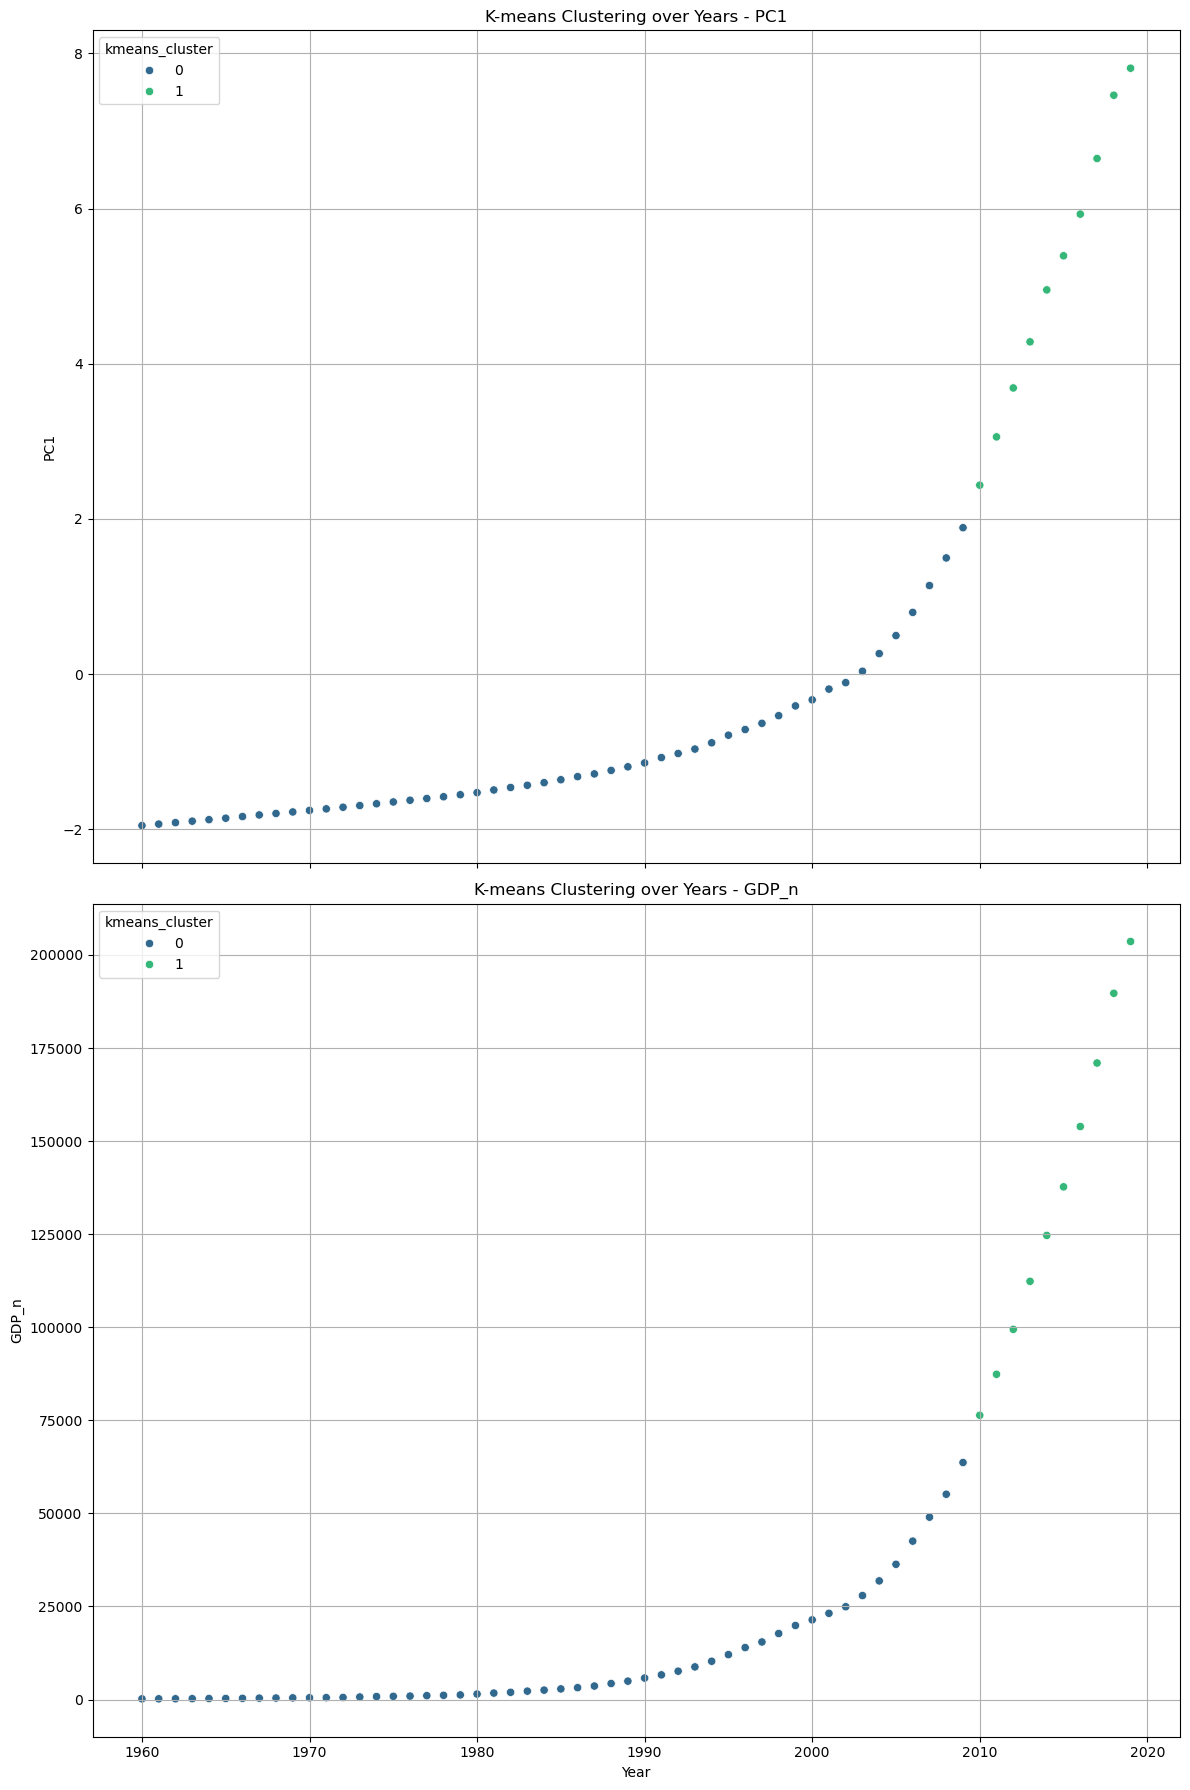

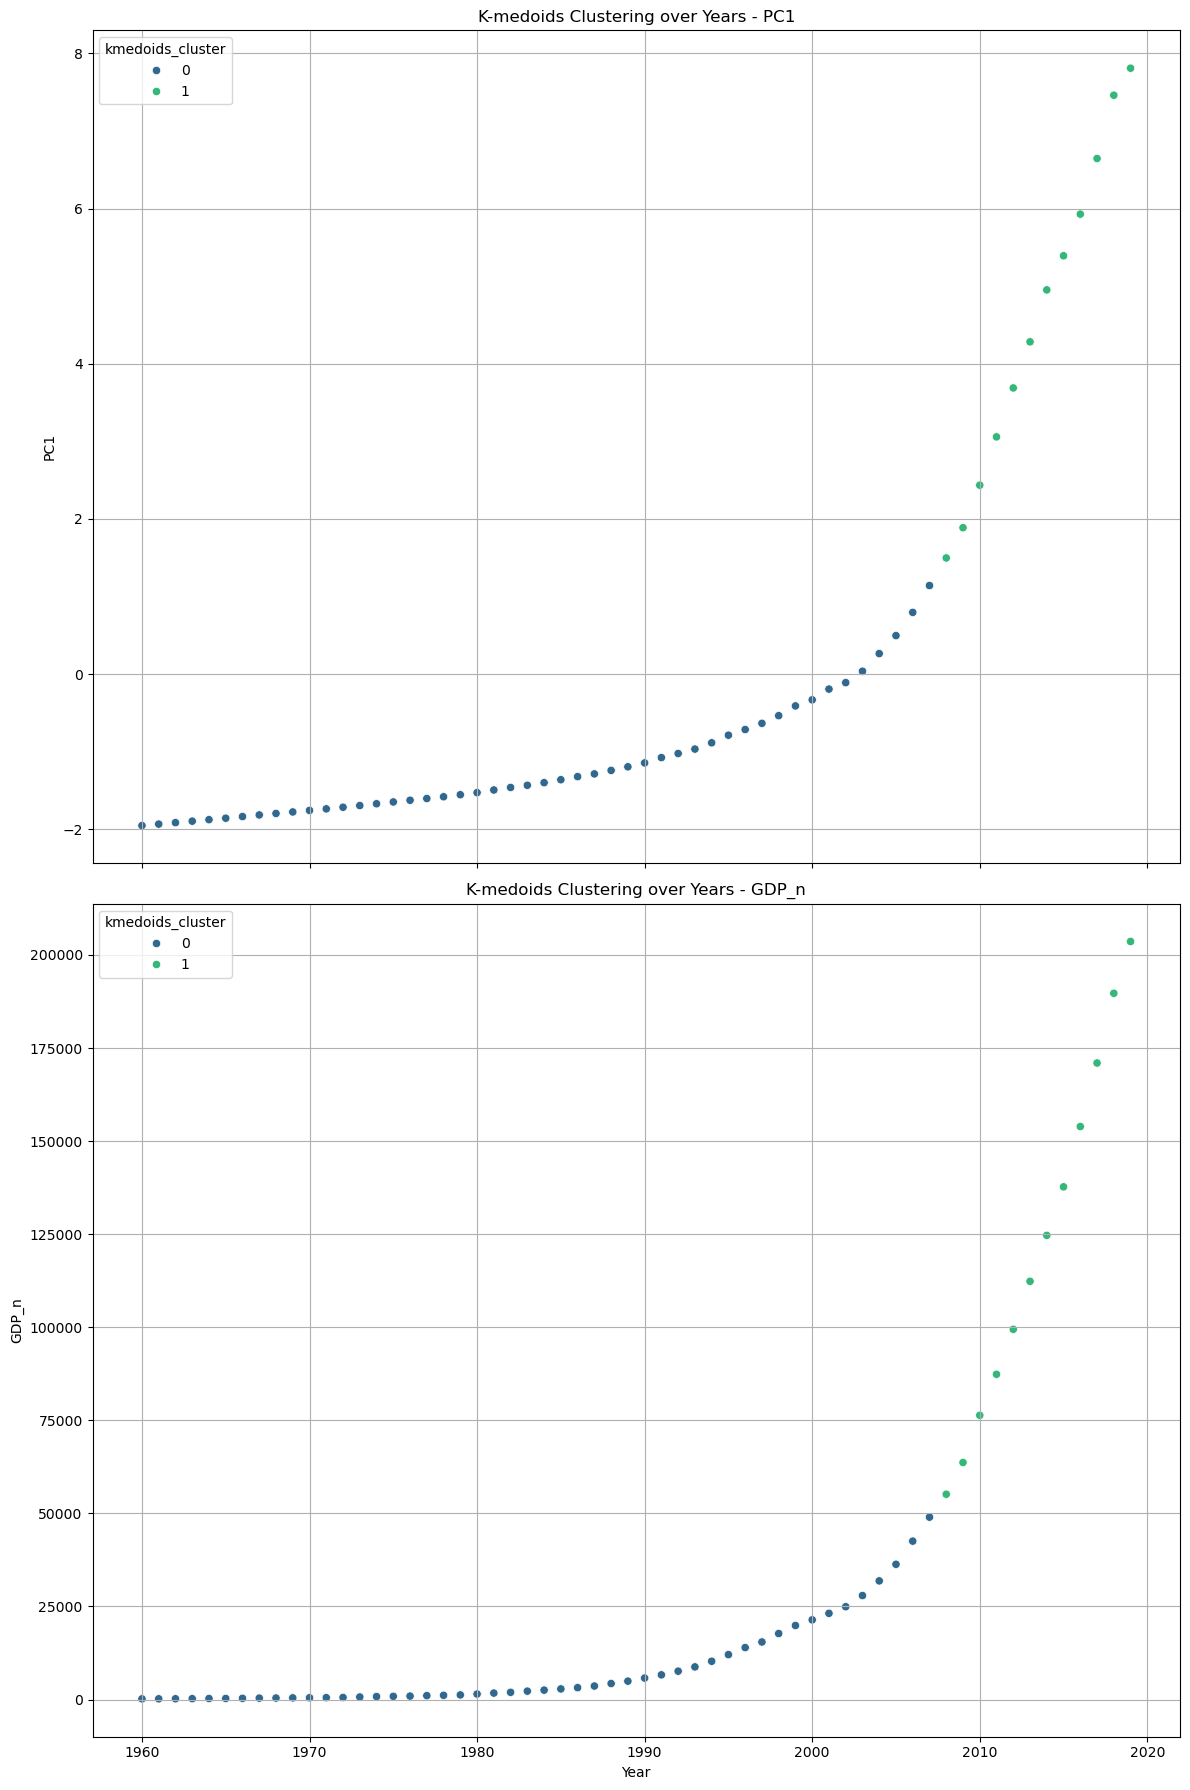

In [255]:
# Assuming the original data includes a "year" column
# Combine the year column and cluster labels into the PCA-reduced dataset for visualization
clustered_data = pd.DataFrame(df_pca_india, columns=['PC1', 'PC2', 'PC3'])  
clustered_data['year'] = df_india['year'] 
clustered_data['GDP_n'] = df_india['GDP_n'] # Replace with the actual year column from your dataset
clustered_data['kmeans_cluster'] = kmeans_labels
clustered_data['kmedoids_cluster'] = kmedoids_labels

# Plot K-means clusters over time for each PCA component
fig, axes = plt.subplots(2, 1, figsize=(12, 18), sharex=True)

for idx, pc in enumerate(['PC1','GDP_n']):
    sns.scatterplot(
        ax=axes[idx],
        x=clustered_data['year'],
        y=clustered_data[pc],
        hue=clustered_data['kmeans_cluster'],
        palette='viridis',
        legend='full'
    )
    axes[idx].set_title(f'K-means Clustering over Years - {pc}')
    axes[idx].set_xlabel('Year')
    axes[idx].set_ylabel(pc)
    axes[idx].grid(True)

plt.tight_layout()
plt.show()

# Plot K-medoids clusters over time for each PCA component
fig, axes = plt.subplots(2, 1, figsize=(12, 18), sharex=True)

for idx, pc in enumerate(['PC1', 'GDP_n']):
    sns.scatterplot(
        ax=axes[idx],
        x=clustered_data['year'],
        y=clustered_data[pc],
        hue=clustered_data['kmedoids_cluster'],
        palette='viridis',
        legend='full'
    )
    axes[idx].set_title(f'K-medoids Clustering over Years - {pc}')
    axes[idx].set_xlabel('Year')
    axes[idx].set_ylabel(pc)
    axes[idx].grid(True)

plt.tight_layout()
plt.show()


ADF Statistic: 2.2972208363928477, p-value: 0.9989534107657555
Forecast: 60    12960.215828
61    13526.673958
62    14085.701670
63    14637.396429
64    15181.854425
Name: predicted_mean, dtype: float64


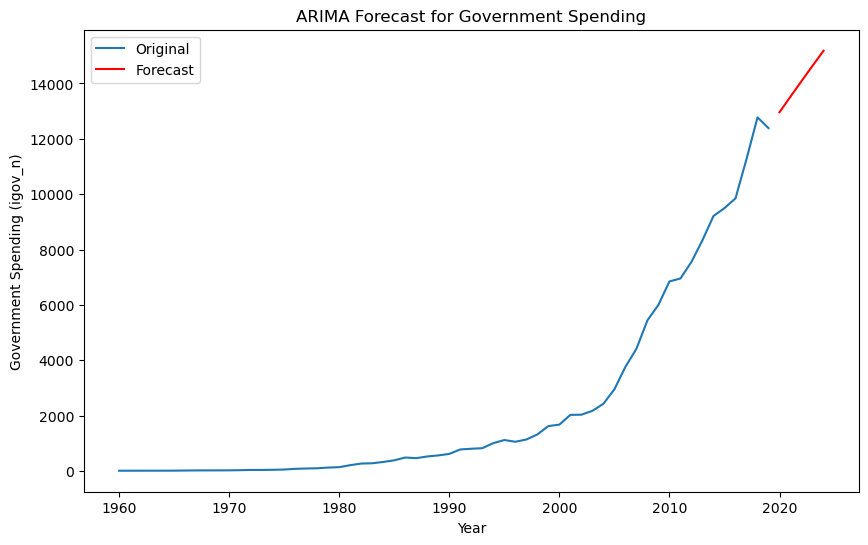

In [195]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Check stationarity using ADF test
result = adfuller(df_india['igov_n'])
print(f'ADF Statistic: {result[0]}, p-value: {result[1]}')

# If p-value > 0.05, differencing is required to make it stationary
df_india['igov_n_diff'] = df_india['igov_n'].diff().dropna()

# Fit ARIMA model (example: ARIMA(1,1,1))
model = ARIMA(df_india['igov_n'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast next 5 years
forecast = model_fit.forecast(steps=5)
print(f"Forecast: {forecast}")

# Plot original vs forecast
plt.figure(figsize=(10, 6))
plt.plot(df_india['year'], df_india['igov_n'], label='Original')
plt.plot(df_india['year'].iloc[-1] + np.arange(1, 6), forecast, label='Forecast', color='red')
plt.xlabel('Year')
plt.ylabel('Government Spending (igov_n)')
plt.title('ARIMA Forecast for Government Spending')
plt.legend()
plt.show()


Epoch 1/25


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0142
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0120
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0106
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0071
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0082
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0070
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0068
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0069
Epoch 9/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0068
Epoch 10/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0062
Epoch 11/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0057
Epoch 12/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0055
Epoch 13/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0051
Epoch 14/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0048
Epoch 15/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0047
Epoch 16/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/

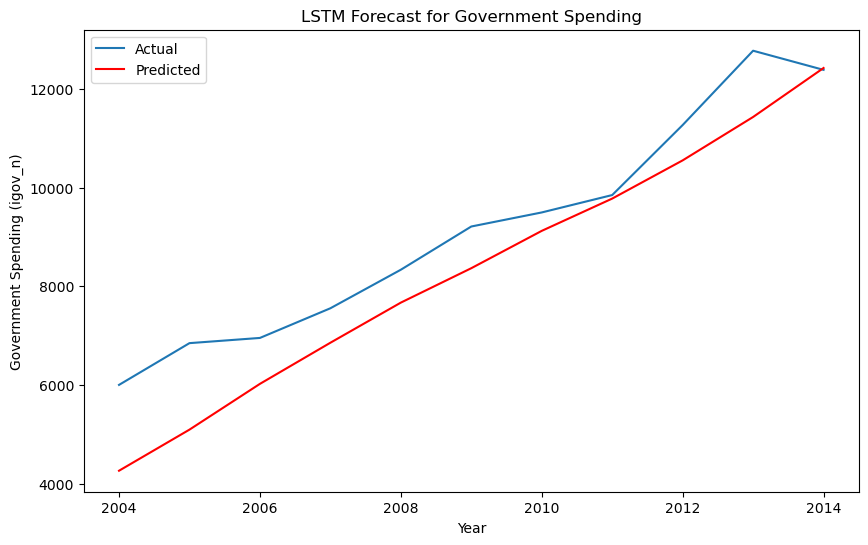

In [262]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare data (use igov_n as an example)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_india[['igov_n']])

# Create sequences for LSTM (X, y)
def create_sequences(data, sequence_length=5):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, sequence_length=5)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32)

# Make predictions
predicted = model.predict(X_test)

# Inverse transform predictions and actual values
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Ensure the lengths of the x-axis (years) and y-axis (actual and predicted values) match
years = df_india['year'].iloc[train_size:train_size + len(y_test)]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(years, y_test, label='Actual')
plt.plot(years, predicted, label='Predicted', color='red')
plt.xlabel('Year')
plt.ylabel('Government Spending (igov_n)')
plt.title('LSTM Forecast for Government Spending')
plt.legend()
plt.show()


In [266]:
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare data (use igov_n as an example)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_india[['igov_n']])

# Create sequences for LSTM (X, y)
def create_sequences(data, sequence_length=5):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, sequence_length=5)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32)

# Make predictions
predicted = model.predict(X_test)

# Inverse transform predictions and actual values
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Ensure the lengths of the x-axis (years) and y-axis (actual and predicted values) match
years = df_india['year'].iloc[train_size:train_size + len(y_test)]

# Create Plotly figure
fig = go.Figure()

# Add actual data line
fig.add_trace(go.Scatter(
    x=years, 
    y=y_test.flatten(), 
    mode='lines', 
    name='Actual',
    line=dict(color='blue', width=2)
))

# Add predicted data line
fig.add_trace(go.Scatter(
    x=years, 
    y=predicted.flatten(), 
    mode='lines', 
    name='Predicted',
    line=dict(color='red', width=2, dash='dash')
))

# Update layout
fig.update_layout(
    title='LSTM Forecast for Government Spending',
    xaxis_title='Year',
    yaxis_title='Government Spending (igov_n)',
    legend_title='Legend',
    template='plotly_dark',
    showlegend=True
)

# Show the plot
fig.show()


Epoch 1/25


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0129
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0112
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0073
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0074
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0060
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0068
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0059
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0063
Epoch 9/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0064
Epoch 10/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0057
Epoch 11/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0051
Epoch 12/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0044
Epoch 13/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0040
Epoch 14/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0041
Epoch 15/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0039
Epoch 16/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


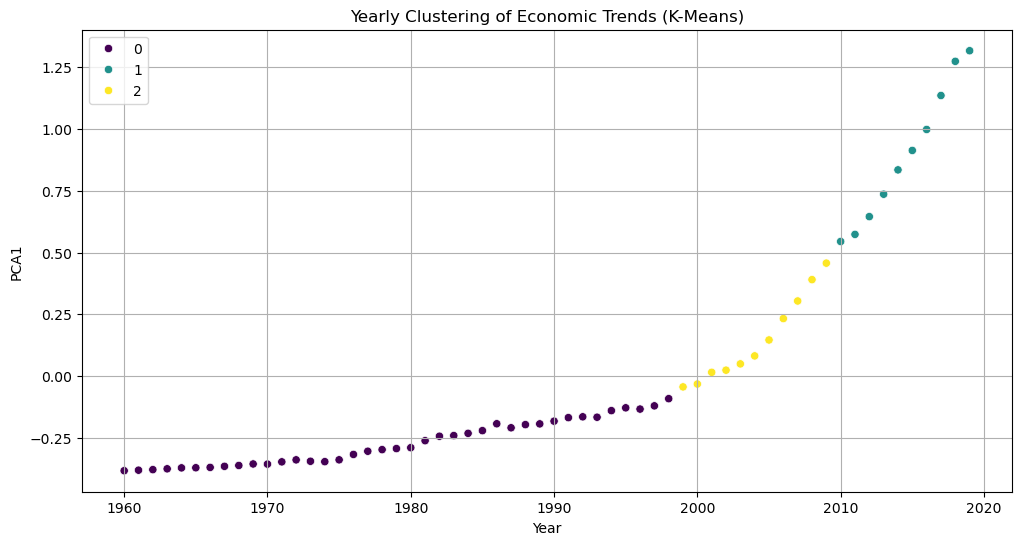

In [198]:
# Aggregate data by year (average of the economic features)
df_yearly = df_india.groupby('year')[['GDP_rppp', 'igov_rppp', 'kpriv_n']].mean()

# Standardize the data
df_scaled_yearly = scaler.fit_transform(df_yearly)

# K-Means clustering for yearly trends
kmeans_yearly = KMeans(n_clusters=3, random_state=42)
kmeans_yearly_labels = kmeans_yearly.fit_predict(df_scaled_yearly)

# PCA for 2D visualization
pca_yearly = PCA(n_components=2)
df_pca_yearly = pca_yearly.fit_transform(df_scaled_yearly)

# Visualize the clustering over time
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_yearly.index, y=df_pca_yearly[:, 0], hue=kmeans_yearly_labels, palette='viridis')
plt.title('Yearly Clustering of Economic Trends (K-Means)')
plt.xlabel('Year')
plt.ylabel('PCA1')
plt.grid(True)
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


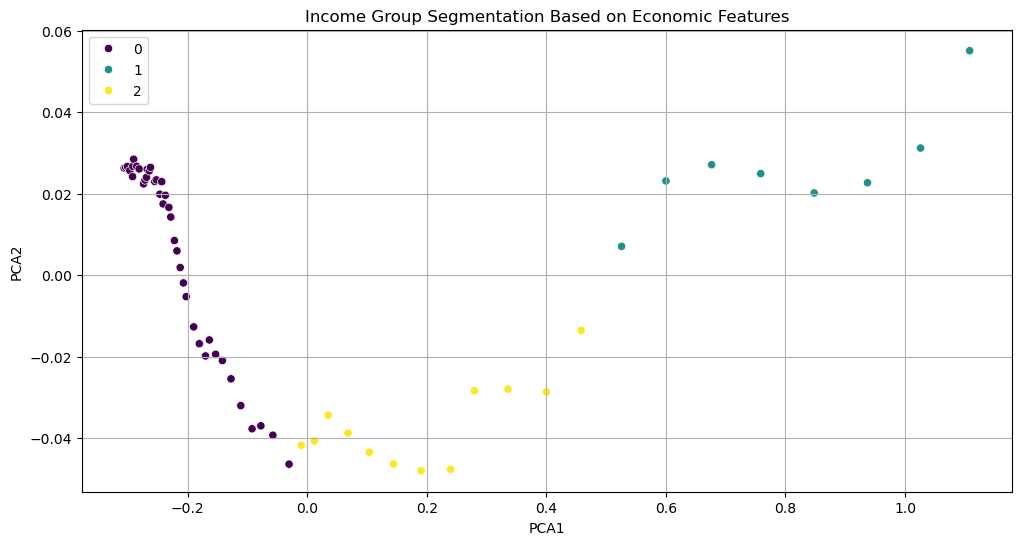

In [199]:
# Select features for income group segmentation
income_features = ['GDP_rppp', 'kpriv_rppp', 'income_Advanced Economies', 
                   'income_Emerging Market Economies', 'income_Low Income Developing Countries']

df_income = df_india[income_features].dropna()

# Standardize the features
df_scaled_income = scaler.fit_transform(df_income)

# K-Means clustering for income segmentation
kmeans_income = KMeans(n_clusters=3, random_state=42)
kmeans_income_labels = kmeans_income.fit_predict(df_scaled_income)

# PCA for 2D visualization
pca_income = PCA(n_components=2)
df_pca_income = pca_income.fit_transform(df_scaled_income)

# Visualize the clustering based on income groups
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_pca_income[:, 0], y=df_pca_income[:, 1], hue=kmeans_income_labels, palette='viridis')
plt.title('Income Group Segmentation Based on Economic Features')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()


In [205]:
df_.head()

,isocode,ifscode,country,year,igov_rppp,kgov_rppp,ipriv_rppp,kpriv_rppp,ippp_rppp,kppp_rppp,GDP_rppp,igov_n,kgov_n,ipriv_n,kpriv_n,kppp_n,GDP_n,income
0,AFG,512,Afghanistan,1960,3.305186,50.134384,1.253210,14.863815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low Income Developing Countries
1,AFG,512,Afghanistan,1961,3.437393,52.144897,1.303339,15.458683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low Income Developing Countries
2,AFG,512,Afghanistan,1962,3.574889,54.235703,1.355472,16.077332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low Income Developing Countries
3,AFG,512,Afghanistan,1963,3.717885,56.410011,1.409691,16.720713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low Income Developing Countries
4,AFG,512,Afghanistan,1964,3.866600,58.671173,1.466079,17.389818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low Income Developing Countries


In [209]:
all_countries_cluster_df = df_.drop(columns=['isocode','country'], axis=1).copy() 
all_countries_cluster_df = all_countries_cluster_df.fillna(0.0)

In [211]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Label encode the 'income' column
le = LabelEncoder()
all_countries_cluster_df['income'] = le.fit_transform(all_countries_cluster_df['income'])

# Define the feature matrix (X) and target vector (Y)
X = all_countries_cluster_df.drop(columns=['income', 'ifscode'], axis=1)
Y = all_countries_cluster_df['income']

# Check if X and Y have the same number of samples
print(X.shape, Y.shape)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Apply LDA for classification (fit the model with training data)
lda.fit(X_train, Y_train)

# Predict using the trained model
Y_pred = lda.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Optionally, for dimensionality reduction (if you want to reduce features):
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

print("Transformed Training Data (LDA):", X_train_lda.shape)
print("Transformed Test Data (LDA):", X_test_lda.shape)


(11640, 14) (11640,)
Accuracy: 0.52
Transformed Training Data (LDA): (9312, 2)
Transformed Test Data (LDA): (2328, 2)


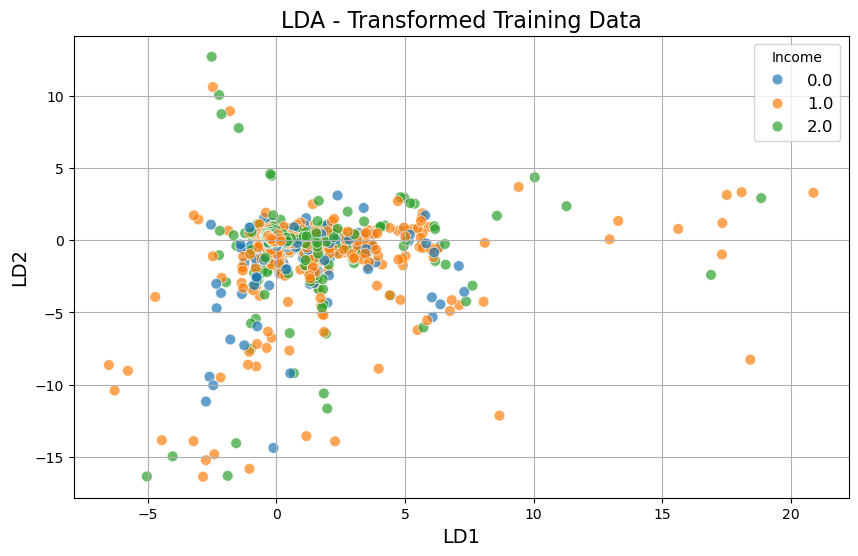

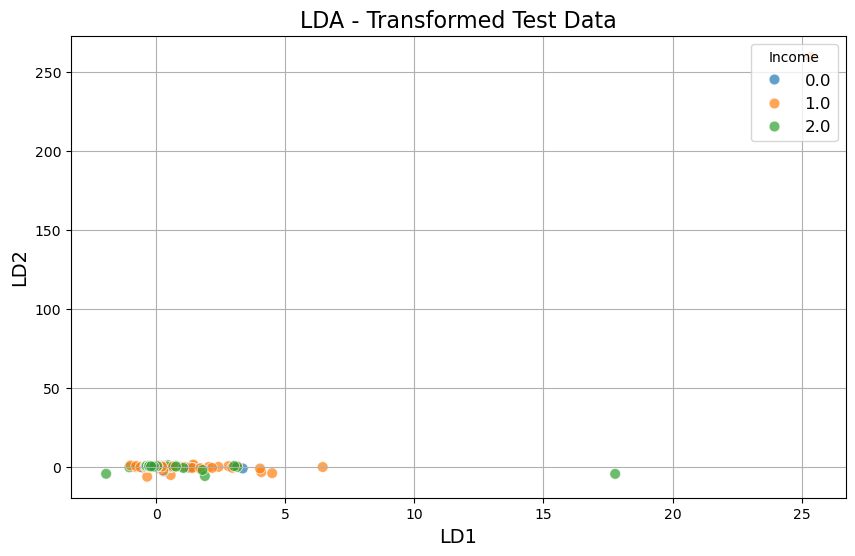

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for the LDA-transformed data
lda_df_train = pd.DataFrame(X_train_lda, columns=['LD1', 'LD2'])
lda_df_train['income'] = Y_train

lda_df_test = pd.DataFrame(X_test_lda, columns=['LD1', 'LD2'])
lda_df_test['income'] = Y_test

# Plotting the transformed training data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LD1', y='LD2', hue='income', data=lda_df_train, palette='tab10', alpha=0.7, s=60)
plt.title('LDA - Transformed Training Data', fontsize=16)
plt.xlabel('LD1', fontsize=14)
plt.ylabel('LD2', fontsize=14)
plt.legend(title='Income', loc='upper right', fontsize=12)
plt.grid(True)
plt.show()

# Plotting the transformed test data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LD1', y='LD2', hue='income', data=lda_df_test, palette='tab10', alpha=0.7, s=60)
plt.title('LDA - Transformed Test Data', fontsize=16)
plt.xlabel('LD1', fontsize=14)
plt.ylabel('LD2', fontsize=14)
plt.legend(title='Income', loc='upper right', fontsize=12)
plt.grid(True)
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


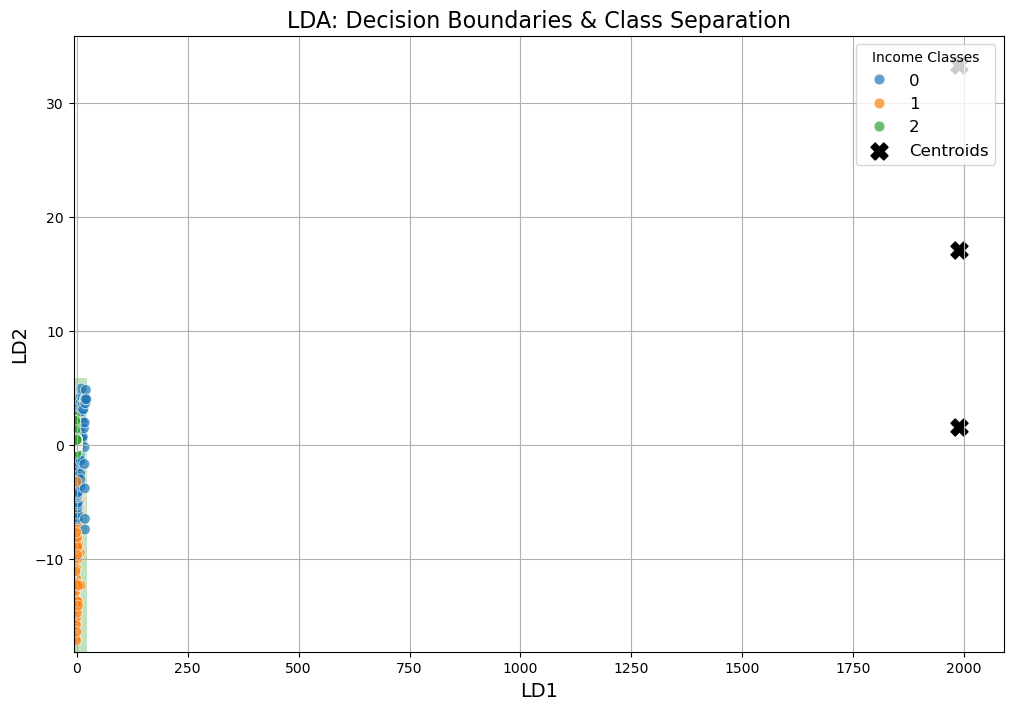

In [214]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
Y_encoded = le.fit_transform(Y)

# Create the LDA object and fit the data
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, Y_encoded)

# Create a DataFrame for the transformed data
lda_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
lda_df['income'] = Y_encoded

# Plotting the decision boundaries and data points
plt.figure(figsize=(12, 8))

# Define the meshgrid for decision boundary visualization
x_min, x_max = X_lda[:, 0].min() - 1, X_lda[:, 0].max() + 1
y_min, y_max = X_lda[:, 1].min() - 1, X_lda[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Create a meshgrid with the same number of features as the training data
meshgrid = np.c_[xx.ravel(), yy.ravel()]
meshgrid_full = np.zeros((meshgrid.shape[0], X.shape[1]))
meshgrid_full[:, :2] = meshgrid

# Predict on the meshgrid for decision boundary
Z = lda.predict(meshgrid_full)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap='tab10')

# Plot the data points with hue
sns.scatterplot(x='LD1', y='LD2', hue='income', data=lda_df, palette='tab10', alpha=0.7, s=60)

# Plot the centroids of each class in the LDA space
centroids = lda.means_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='black', s=150, label='Centroids')

# Labels and title
plt.title('LDA: Decision Boundaries & Class Separation', fontsize=16)
plt.xlabel('LD1', fontsize=14)
plt.ylabel('LD2', fontsize=14)
plt.legend(title='Income Classes', loc='upper right', fontsize=12)
plt.grid(True)
plt.show()


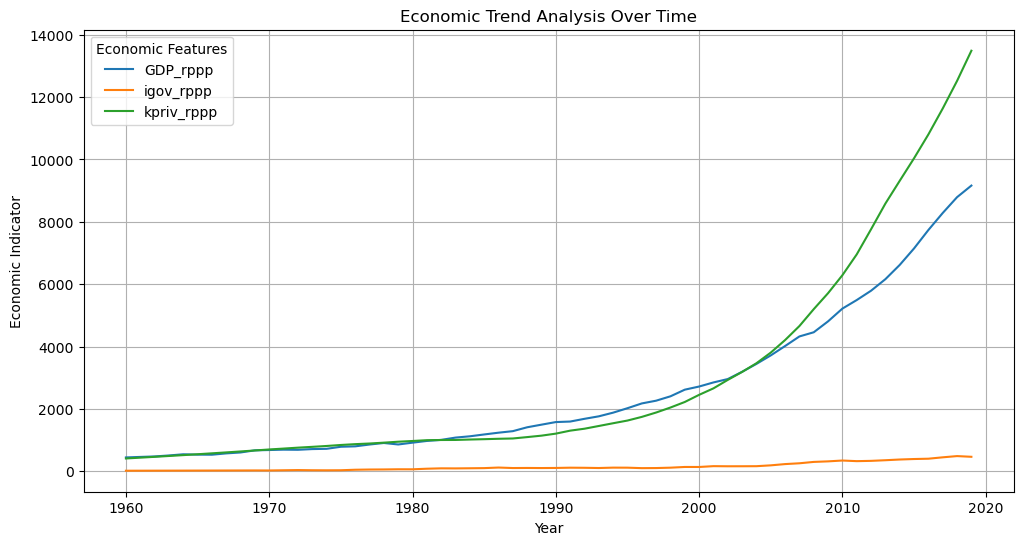

In [221]:
import matplotlib.pyplot as plt

# Select economic features for trend analysis
economic_features_trend = ['GDP_rppp', 'igov_rppp', 'kpriv_rppp']

# Plot the trend of these features over the years
plt.figure(figsize=(12, 6))
for feature in economic_features_trend:
    plt.plot(df_india['year'], df_india[feature], label=feature)

plt.title('Economic Trend Analysis Over Time')
plt.xlabel('Year')
plt.ylabel('Economic Indicator')
plt.legend(title='Economic Features')
plt.grid(True)
plt.show()


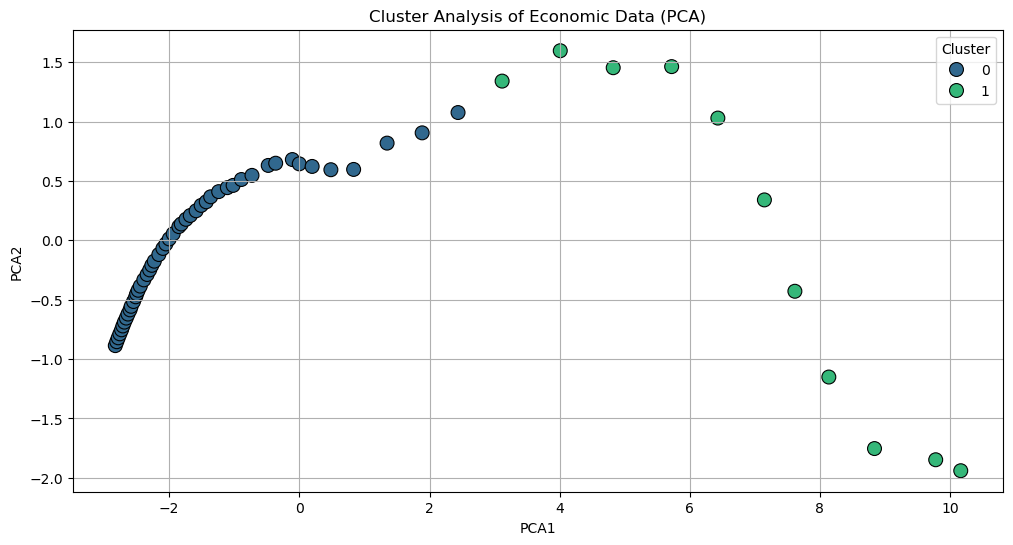

In [223]:
import seaborn as sns

# Assuming 'kmeans_labels' are the cluster labels from K-Means
# Use PCA to reduce the dimensions to 2D
pca = PCA(n_components=2)
df_pca = pca.fit_transform(x_scaled)  # Use the scaled economic data

# Create a DataFrame for easier plotting
df_pca_df = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca_df['Cluster'] = kmeans_labels

# Scatter plot of the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca_df, palette='viridis', s=100, edgecolor='black')
plt.title('Cluster Analysis of Economic Data (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [226]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Democratic Republic of the',
       'Congo, Republic of', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', "Côte d'Ivoire", 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guate

In [228]:
import pandas as pd
import plotly.express as px

# Assuming df contains the data and 'country' and 'GDP_rppp' are relevant columns
countries = ['India', 'Pakistan', 'China', 'Afghanistan', 'United Arab Emirates', 'Vietnam', 'United States', 'Russia', 'United Kingdom']

# Filter data for the selected countries
filtered_data = df[df['country'].isin(countries)]

# Create the interactive line plot
fig = px.line(filtered_data, x='year', y='GDP_rppp', color='country', markers=True,
              title='GDP Trends Over the Years by Country')

# Customize layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='GDP (PPP)',
    legend_title='Country',
    template='plotly_dark'
)

# Show the plot
fig.show()
